# Fe-Ni-Ti-Al novel alloy customization

- Authors: Yao Xiling, Chen Lequn

- System requirement
    - Python 3.9.12
    - Pymoo 0.6.0
    
 This program builds the metamodels using the single equilibrium result of Fe-Ni-Ti-Al alloy

### Import necessary libraries

In [1]:
import pandas as pd
from pandas import DataFrame

# For data standardization (transformation of the data onto unit scale (mean=0 and variance=1), required in most machine learning)
from sklearn.preprocessing import StandardScaler
# For K means clustering on W(FCC_A1#1,CR)_max
from sklearn.cluster import KMeans
# For principal component analysis (PCA):
from sklearn.decomposition import PCA as sklearnPCA
# import plotly.io as pio
# For K Nearest Neighbours (Regression):
from sklearn import neighbors
# For linear models (Regression):
from sklearn import linear_model
# For Polynomial regression model:
from sklearn.preprocessing import PolynomialFeatures
# For support vector regression:
from sklearn import svm
# For neural network regression:
from sklearn import neural_network
# For decision tree regression:
from sklearn import tree
# For ensemble methods:
from sklearn import ensemble
# For data standardization (transform the data so that they have a near-normally distribution with zero mean and unit variance)
from sklearn import preprocessing
from sklearn.utils import shuffle

from sklearn.model_selection import KFold
import seaborn as sns

# Use grid search with cross validation to select ML model parameters:
from sklearn.model_selection import train_test_split  # random split the data into "training data" and "testing data"
from sklearn.model_selection import GridSearchCV  # Exhaustive grid search with cross validation (CV)
from sklearn import metrics
# User imputation to handle missing data in T_Ni3Ti (Ni3Ti formation temperature)
from sklearn.impute import SimpleImputer

# For Parallel Coordinates Plot
# import plotly.graph_objects as go

# For material design optimization:
from scipy.optimize import differential_evolution
from scipy.optimize import NonlinearConstraint, Bounds  # constraints in differential_evolution() (NOT used in this program yet)

# For multiobjective optimization using pymoo:
#import autograd.numpy as anp
import numpy as np
import pymoo
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
# from pymoo.factory import get_sampling, get_crossover, get_mutation, get_termination, get_decomposition
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
# from pymoo.performance_indicator.hv import Hypervolume
import matplotlib.pyplot as plt
from matplotlib.pyplot import gca 
import os

In [2]:
PROJECT_ROOT_DIR = "../"
IMAGE_PATH = os.path.join(PROJECT_ROOT_DIR, "result_images")
os.makedirs(IMAGE_PATH, exist_ok=True)

## function for automatically save the diagram/graph into the folder 
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGE_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Get the raw data (Thermal-Calc results)

- These files are not included becuase they are confidential

In [3]:
# wt_Ni3Ti_list = []
# wt_Laves_list = []
# wt_FCC_list = []

# T_Ni3Ti_list = []


# for num in range (0,1815):
#     resultFile = "Fe-Ni-Ti-Al_single_eq_results/single_eq_" + format(num+1) + ".txt"
#     resultFile = open(resultFile, 'r')
#     result = resultFile.read()  # result is a string

#     #print(num+1)

#     # Obtain the system mass in grams (N=1, 1 mole):
#     # Remove all characters before 'Mass in grams'
#     result_mass = result[result.find('Mass in grams'):]  # .find() returns the index in the string
#     result_mass = result_mass.split(' ')  # a list of string
#     # print(result_mass)
#     system_mass = result_mass[4]  # system_mass is a string
#     system_mass = system_mass.rstrip('\n')  # remove the trailing '\n'
#     system_mass = float(system_mass)  # convert the string in exponential form (e.g., "12E-01") to float
#     #print(system_mass)


#     if 'NI3TI' in result:
#         # Remove all characters before 'NI3TI'
#         result_Ni3Ti = result[result.find('NI3TI'):]  # .find() returns the index in the string
#         result_Ni3Ti = result_Ni3Ti.split(' ')  # a list of string
#         wt_Ni3Ti = result_Ni3Ti[36]  # wt_Ni3Ti is a string
#         wt_Ni3Ti = wt_Ni3Ti.rstrip(',')  # remove the trailing ','
#         wt_Ni3Ti = float(wt_Ni3Ti) / system_mass * 100.0 # convert the string in exponential form (e.g., "12E-01") to float
#         #print('Ni3Ti = ' + format(wt_Ni3Ti))
#         wt_Ni3Ti_list.append(wt_Ni3Ti)
#     else:
#         wt_Ni3Ti_list.append(0.0)

#     if 'LAVES_PHASE_C14' in result:
#         # Remove all characters before 'LAVES_PHASE_C14'
#         result_Laves = result[result.find('LAVES_PHASE_C14'):]  # .find() returns the index in the string
#         result_Laves = result_Laves.split(' ')  # a list of string
#         wt_Laves = result_Laves[26]  # wt_Laves is a string
#         wt_Laves = wt_Laves.rstrip(',')  # remove the trailing ','
#         wt_Laves = float(wt_Laves) / system_mass * 100.0  # convert the string in exponential form (e.g., "12E-01") to float
#         #print('Laves = ' + format(wt_Laves))
#         wt_Laves_list.append(wt_Laves)
#     else:
#         wt_Laves_list.append(0.0)

#     if 'FCC_A1' in result:
#         # Remove all characters before 'FCC_A1'
#         result_FCC = result[result.find('FCC_A1'):]  # .find() returns the index in the string
#         result_FCC = result_FCC.split(' ')  # a list of string
#         if 'FCC_A1#1' in result:
#             wt_FCC = result_FCC[33]  # wt_FCC is a string
#         else:  # 'FCC_A1' only, without '#1'
#             wt_FCC = result_FCC[35]  # wt_FCC is a string
#         wt_FCC = wt_FCC.rstrip(',')  # remove the trailing ','
#         wt_FCC = float(wt_FCC) / system_mass * 100.0  # convert the string in exponential form (e.g., "12E-01") to float
#         #print('FCC = ' + format(wt_FCC))
#         wt_FCC_list.append(wt_FCC)
#     else:
#         wt_FCC_list.append(0.0)
        
        
#     #----------------------------------------------------------------------------------------
#     # The T vs Phases property diagram Excel ".xls" files:
#     propertyDiagramFile = "Fe-Ni-Ti-Al_property_diagram_results/property_diagram_" + format(num+1) + ".xls"

#     Ni3Ti_property_diagram = []  # list of all Ni3Ti data in the excel file
#     T_property_diagram = []  # list of all temperature data in the excel file

#     # Read the .xls file as text:
#     lines = [line.rstrip('\n') for line in open(propertyDiagramFile)]  # "lines" is a list of strings. Each string is a row
#     for i, row in enumerate(lines):
#         if i == 0:
#             continue  # i.e. the 1st row has only the strings "T BPW(LIQUID) BPW(BCC_A2) ...", skip the 1st row
#         row = row.split('\t')  # adjacent columns have a "tab" in between. "row" is now a list of strings ['xx', 'xx', ...]
#         T_property_diagram.append(float(row[0]))
#         Ni3Ti_property_diagram.append(float(row[5]))

#     Ni3Ti_property_diagram_new = [x for x in Ni3Ti_property_diagram if float(x) > 0.01]  # remove all values less than 0.01 (1wt%) Ni3Ti

#     if not Ni3Ti_property_diagram_new:  # if the list is empty, i.e., no Ni3Ti formation (or less than 0.01, 1wt%)
#         T_Ni3Ti_list.append(np.nan)  # a missing value

#     else:
#         # Get the temperature when Ni3Ti starts to form (i.e., the temperature at minimum Ni3Ti)
#         T_Ni3Ti = T_property_diagram[ Ni3Ti_property_diagram.index( min(Ni3Ti_property_diagram_new) ) ]
#         T_Ni3Ti_list.append(T_Ni3Ti)

In [4]:
# # # Upper and lower bounds used in plotting
# Ni3Ti_upper = max(wt_Ni3Ti_list)
# Ni3Ti_lower = min(wt_Ni3Ti_list)
# Laves_upper = max(wt_Laves_list)
# Laves_lower = min(wt_Laves_list)
# FCC_upper = max(wt_FCC_list)
# FCC_lower = min(wt_FCC_list)
# T_Ni3Ti_upper = max(T_Ni3Ti_list)
# T_Ni3Ti_lower = min(T_Ni3Ti_list)

In [5]:
# print (Ni3Ti_upper)
# print (Laves_upper)

In [6]:
Ni3Ti_upper = 31.732793058518638
Laves_upper = 44.22484952625227

### Create pandas dataframe (skip this)
- All the the results are already stored into csv files
- single_eq_Ni3Ti_metamodel folder
- single_eq_Laves_metamodel
- single_eq_FCC_metamodel
- property_diagram_T_Ni3Ti_metamodel/ T_Ni3Ti_vs_composition
- All_data

### Retrieve pandas dataframe from the csv file

In [7]:
df_All = pd.read_csv('All_data.csv')
# df_T_Ni3Ti = pd.read_csv('property_diagram_T_Ni3Ti_metamodel/T_Ni3Ti_vs_composition.csv')
# df_FCC = pd.read_csv("single_eq_FCC_metamodel/FCC_vs_composition.csv")
# df_Laves = pd.read_csv("single_eq_Laves_metamodel/Laves_vs_composition.csv")
# df_Ni3Ti = pd.read_csv("single_eq_Ni3Ti_metamodel/Ni3Ti_vs_composition.csv")
# df_Ni3Ti_Laves_FCC = pd.read_csv("Ni3Ti_Laves_FCC_vs_composition.csv")

### Inspect the dataframes

In [8]:
df_All.head()

Ni   Ti   Al     Ni3Ti  Laves        FCC   T_Ni3Ti
0  15.0  1.0  0.0  4.677395    0.0  18.713854  894.8367
1  16.0  1.0  0.0  4.677250    0.0  20.384773  894.8367
2  17.0  1.0  0.0  4.677283    0.0  22.057620  894.8367
3  18.0  1.0  0.0  4.677316    0.0  23.728838  904.1500
4  19.0  1.0  0.0  4.677340    0.0  25.400160  914.1500

## Data preparation for Machine Learning Metamodel (regression)

In [9]:
# Feature selection - select the variables that has strong contribution to the output
# Reference:  https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e
# Reference:  https://scikit-learn.org/stable/modules/feature_selection.html
# Method: Correlation matrix shown in Heatmap

#correlation_matrix = df_All.corr(method='spearman')  # 'spearman' for monotonic correlation, 'pearson' for linear correlation
#print(correlation_matrix)
## Use a Heatmap to visualize the correlation matrix:
#fig = go.Figure(data=go.Heatmap(z=correlation_matrix,
                                #x=["Ni", "Ti", "Al", "Ni3Ti", "Laves", "FCC", "T_Ni3Ti"],
                                #y=["Ni", "Ti", "Al", "Ni3Ti", "Laves", "FCC", "T_Ni3Ti"]))
## Use the offline mode of plotly:
#pio.write_html(fig, file="Correlation matrix (all data) (spearman).html", auto_open=True)

### correlation matrix

In [10]:
df_All_selected = df_All[["Ni", "Ti", "Al", "Ni3Ti", "Laves"]]

Saving figure correlation_heatmap


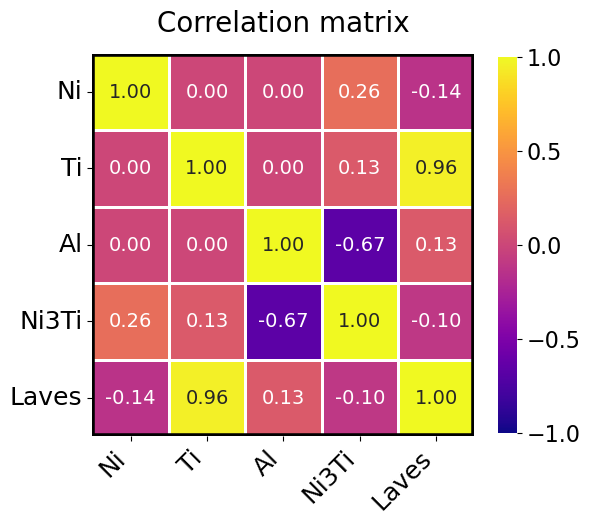

In [11]:
corr = df_All_selected.corr(method='spearman')
fig, ax = plt.subplots(figsize=(6,6))         # Sample figsize in inches
# sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)
# sns.set(font_scale=1.2)
sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    # cmap=sns.diverging_palette(20, 220, n=200),
    cmap="plasma", #plasma, inferno,gnuplot, spring  https://matplotlib.org/2.0.2/users/colormaps.html
    square=True,
    ax=ax,
    annot=True,
    annot_kws={"size":14},
    cbar_kws={"shrink": .7,
             "ticks": [-1,-0.5, 0,0.5, 1]},
    fmt='.2f',
    linewidths=0.8, linecolor='white'
)

##---------set color bar text font size
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
    fontsize = 18,
)

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    # horizontalalignment='right',
    fontsize = 18
)

ax.set_title("Correlation matrix", fontsize = 20, pad = 16)

ax.axhline(y=0, color='k',linewidth=4)
ax.axhline(y=corr.shape[1], color='k',linewidth=4)
ax.axvline(x=0, color='k',linewidth=4)
ax.axvline(x=corr.shape[0], color='k',linewidth=4)

save_fig('correlation_heatmap')

### Split data into Features X and Lable Y

In [12]:
X_Ni3Ti = df_All_selected.iloc[:,0:3].values  # alloy composition
Y_Ni3Ti = df_All_selected.iloc[:,3].values    # Ni3Ti weight percent
X_Laves = df_All_selected.iloc[:,0:3].values  # alloy composition
Y_Laves = df_All_selected.iloc[:,4].values    # Laves weight percent

### Train test split

In [13]:
X_Ni3Ti_train, X_Ni3Ti_test, Y_Ni3Ti_train, Y_Ni3Ti_test = train_test_split(X_Ni3Ti, Y_Ni3Ti, test_size=0.3, random_state=0, shuffle=True)
X_Laves_train, X_Laves_test, Y_Laves_train, Y_Laves_test = train_test_split(X_Laves, Y_Laves, test_size=0.3, random_state=0, shuffle=True)

### Data standarization

In [14]:
scaler = preprocessing.StandardScaler().fit(X_Ni3Ti)  # X_Ni3Ti == X_Laves == X_FCC == X_T_Ni3Ti == [Ni_list, Ti_list, Al_list]

#scaler = preprocessing.StandardScaler().fit(X_Ni3Ti_train)
X_Ni3Ti_train_transformed = scaler.transform(X_Ni3Ti_train)
X_Ni3Ti_test_transformed = scaler.transform(X_Ni3Ti_test)

#scaler = preprocessing.StandardScaler().fit(X_Laves_train)
X_Laves_train_transformed = scaler.transform(X_Laves_train)
X_Laves_test_transformed = scaler.transform(X_Laves_test)


## ML training, with hyperparameter optimization, cross-validation

#### Ni3Ti

In [15]:
# poly = PolynomialFeatures(degree=2)
# X_Ni3Ti_train_transformed = poly.fit_transform(X_Ni3Ti_train_transformed)
# X_Ni3Ti_test_transformed = poly.fit_transform(X_Ni3Ti_test_transformed)
# metamodel_Ni3Ti = linear_model.LinearRegression()

tuned_parameters = {'n_neighbors': [3, 4, 5, 6, 7, 8, 9],
                    'weights': ['uniform', 'distance']}    # a dict (dictionary)
score = "r2" #"neg_mean_squared_error"
metamodel_Ni3Ti_KNN = GridSearchCV(neighbors.KNeighborsRegressor(), tuned_parameters, scoring=score, cv=4)

# tuned_parameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#                     'degree': [2, 3, 4],
#                     'gamma': ['scale', 'auto']}    # a dict (dictionary)
# score = "r2" #"neg_mean_squared_error"
# metamodel_Ni3Ti = GridSearchCV(svm.SVR(), tuned_parameters, scoring=score, cv=4)

tuned_parameters = {'max_depth': [2,3,4,5,6]}    # a dict (dictionary)
score = "r2" #"neg_mean_squared_error"
metamodel_Ni3Ti_DT = GridSearchCV(tree.DecisionTreeRegressor(), tuned_parameters, scoring=score, cv=4)

tuned_parameters = {'n_estimators': [100,200,300,400]}    # a dict (dictionary)
score = "r2" #"neg_mean_squared_error"
metamodel_Ni3Ti_AdaBoost = GridSearchCV(ensemble.AdaBoostRegressor(), tuned_parameters, scoring=score, cv=4)

# RandomForestRegressor is has highest R2 score for Ni3Ti metamodel
tuned_parameters = {'max_depth': [10,30,60,90,100]}    # a dict (dictionary)
score = "r2" #"neg_mean_squared_error"
metamodel_Ni3Ti_RF = GridSearchCV(ensemble.RandomForestRegressor(), tuned_parameters, scoring=score, cv=4)

#### Laves

In [16]:
#poly = PolynomialFeatures(degree=2)
#X_Laves_train_transformed = poly.fit_transform(X_Laves_train_transformed)
#X_Laves_test_transformed = poly.fit_transform(X_Laves_test_transformed)
#metamodel_Laves = linear_model.LinearRegression()

# KNeighborsRegressor can result in zero Laves in optimized composition, although the metamodel does not have the highest R2 score
tuned_parameters = {'n_neighbors': [3, 4, 5, 6, 7, 8, 9],
                    'weights': ['uniform', 'distance']}    # a dict (dictionary)
score = "r2" #"neg_mean_squared_error"
metamodel_Laves_KNN = GridSearchCV(neighbors.KNeighborsRegressor(), tuned_parameters, scoring=score, cv=4)

# tuned_parameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#                     'degree': [2, 3, 4],
#                     'gamma': ['scale', 'auto']}    # a dict (dictionary)
# score = "r2" #"neg_mean_squared_error"
# metamodel_Laves = GridSearchCV(svm.SVR(), tuned_parameters, scoring=score, cv=4)

tuned_parameters = {'max_depth': [2,3,4,5,6]}    # a dict (dictionary)
score = "r2" #"neg_mean_squared_error"
metamodel_Laves_DT = GridSearchCV(tree.DecisionTreeRegressor(), tuned_parameters, scoring=score, cv=4)

tuned_parameters = {'n_estimators': [100,200,300,400]}    # a dict (dictionary)
score = "r2" #"neg_mean_squared_error"
metamodel_Laves_AdaBoost = GridSearchCV(ensemble.AdaBoostRegressor(), tuned_parameters, scoring=score, cv=4)

# RandomForestRegressor is has highest R2 score for Laves metamodel
tuned_parameters = {'max_depth': [10,30,60,90,100]}    # a dict (dictionary)
score = "r2" #"neg_mean_squared_error"
metamodel_Laves_RF = GridSearchCV(ensemble.RandomForestRegressor(), tuned_parameters, scoring=score, cv=4)

In [17]:
#poly = PolynomialFeatures(degree=2)
#X_FCC_train_transformed = poly.fit_transform(X_FCC_train_transformed)
#X_FCC_test_transformed = poly.fit_transform(X_FCC_test_transformed)
#metamodel_FCC = linear_model.LinearRegression()

tuned_parameters = {'n_neighbors': [3, 4, 5, 6, 7, 8, 9],
                    'weights': ['uniform', 'distance']}    # a dict (dictionary)
score = "r2" #"neg_mean_squared_error"
metamodel_FCC_KNN = GridSearchCV(neighbors.KNeighborsRegressor(), tuned_parameters, scoring=score, cv=4)

# tuned_parameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#                     'degree': [2, 3, 4],
#                     'gamma': ['scale', 'auto']}    # a dict (dictionary)
# score = "r2" #"neg_mean_squared_error"
# metamodel_FCC = GridSearchCV(svm.SVR(), tuned_parameters, scoring=score, cv=4)

tuned_parameters = {'max_depth': [2,3,4,5,6]}    # a dict (dictionary)
score = "r2" #"neg_mean_squared_error"
metamodel_FCC_DT = GridSearchCV(tree.DecisionTreeRegressor(), tuned_parameters, scoring=score, cv=4)

tuned_parameters = {'n_estimators': [100,200,300,400]}    # a dict (dictionary)
score = "r2" #"neg_mean_squared_error"
metamodel_FCC_AdaBoost = GridSearchCV(ensemble.AdaBoostRegressor(), tuned_parameters, scoring=score, cv=4)

# RandomForestRegressor is has highest R2 score for FCC metamodel
tuned_parameters = {'max_depth': [10,30,60,90,100]}    # a dict (dictionary)
score = "r2" #"neg_mean_squared_error"
metamodel_FCC_RF = GridSearchCV(ensemble.RandomForestRegressor(), tuned_parameters, scoring=score, cv=4)

In [18]:
#poly = PolynomialFeatures(degree=2)
#X_T_Ni3Ti_train_transformed = poly.fit_transform(X_T_Ni3Ti_train_transformed)
#X_T_Ni3Ti_test_transformed = poly.fit_transform(X_T_Ni3Ti_test_transformed)
#metamodel_T_Ni3Ti = linear_model.LinearRegression()

tuned_parameters = {'n_neighbors': [3, 4, 5, 6, 7, 8, 9],
                    'weights': ['uniform', 'distance']}    # a dict (dictionary)
score = "r2" #"neg_mean_squared_error"
metamodel_T_Ni3Ti_KNN = GridSearchCV(neighbors.KNeighborsRegressor(), tuned_parameters, scoring=score, cv=4)

# tuned_parameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#                     'degree': [2, 3, 4],
#                     'gamma': ['scale', 'auto']}    # a dict (dictionary)
# score = "r2" #"neg_mean_squared_error"
# metamodel_T_Ni3Ti = GridSearchCV(svm.SVR(), tuned_parameters, scoring=score, cv=4)

tuned_parameters = {'max_depth': [2,3,4,5,6]}    # a dict (dictionary)
score = "r2" #"neg_mean_squared_error"
metamodel_T_Ni3Ti_DT = GridSearchCV(tree.DecisionTreeRegressor(), tuned_parameters, scoring=score, cv=4)

tuned_parameters = {'n_estimators': [100,200,300,400]}    # a dict (dictionary)
score = "r2" #"neg_mean_squared_error"
metamodel_T_Ni3Ti_AdaBoost = GridSearchCV(ensemble.AdaBoostRegressor(), tuned_parameters, scoring=score, cv=4)

# RandomForestRegressor has highest R2 score for FCC metamodel
tuned_parameters = {'max_depth': [10,30,60,90,100]}    # a dict (dictionary)
score = "r2" #"neg_mean_squared_error"
metamodel_T_Ni3Ti_RF = GridSearchCV(ensemble.RandomForestRegressor(), tuned_parameters, scoring=score, cv=4)

### Fit the regression models

In [19]:
metamodel_Ni3Ti_RF.fit(X_Ni3Ti_train_transformed, Y_Ni3Ti_train)
metamodel_Laves_RF.fit(X_Laves_train_transformed, Y_Laves_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 30, 60, 90, 100]}, scoring='r2')

In [20]:
metamodel_Ni3Ti_DT.fit(X_Ni3Ti_train_transformed, Y_Ni3Ti_train)
metamodel_Laves_DT.fit(X_Laves_train_transformed, Y_Laves_train)

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5, 6]}, scoring='r2')

In [21]:
metamodel_Ni3Ti_KNN.fit(X_Ni3Ti_train_transformed, Y_Ni3Ti_train)
metamodel_Laves_KNN.fit(X_Laves_train_transformed, Y_Laves_train)

GridSearchCV(cv=4, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [22]:
metamodel_Ni3Ti_AdaBoost.fit(X_Ni3Ti_train_transformed, Y_Ni3Ti_train)
metamodel_Laves_AdaBoost.fit(X_Laves_train_transformed, Y_Laves_train)

GridSearchCV(cv=4, estimator=AdaBoostRegressor(),
             param_grid={'n_estimators': [100, 200, 300, 400]}, scoring='r2')

## Best hyperparameters of each models

In [23]:
print("\nBest parameters set found on development set:")
print(metamodel_Ni3Ti_KNN.best_params_)
print("\nBest parameters set found on development set:")
print(metamodel_Laves_KNN.best_params_)


Best parameters set found on development set:
{'n_neighbors': 6, 'weights': 'distance'}

Best parameters set found on development set:
{'n_neighbors': 8, 'weights': 'distance'}


In [24]:
print("\nBest parameters set found on development set:")
print(metamodel_Ni3Ti_DT.best_params_)
print("\nBest parameters set found on development set:")
print(metamodel_Laves_DT.best_params_)


Best parameters set found on development set:
{'max_depth': 6}

Best parameters set found on development set:
{'max_depth': 6}


In [25]:
print("\nBest parameters set found on development set:")
print(metamodel_Ni3Ti_AdaBoost.best_params_)
print("\nBest parameters set found on development set:")
print(metamodel_Laves_AdaBoost.best_params_)


Best parameters set found on development set:
{'n_estimators': 300}

Best parameters set found on development set:
{'n_estimators': 400}


In [26]:
print("\nBest parameters set found on development set:")
print(metamodel_Ni3Ti_RF.best_params_)
print("\nBest parameters set found on development set:")
print(metamodel_Laves_RF.best_params_)


Best parameters set found on development set:
{'max_depth': 30}

Best parameters set found on development set:
{'max_depth': 100}


### Testing (cross-validation)

### metamodel_Ni3Ti

In [27]:
# fit_models = []
Ni3Ti_train_accuracy = []
Ni3Ti_train_accuracy_std = []
Ni3Ti_test_accuracy = []
Ni3Ti_test_accuracy_std = []
Ni3Ti_train_mae=[]
Ni3Ti_train_mae_std=[]
Ni3Ti_test_mae=[]
Ni3Ti_test_mae_std=[]

Saving figure Ni3Ti precipitateKNN_test_.png


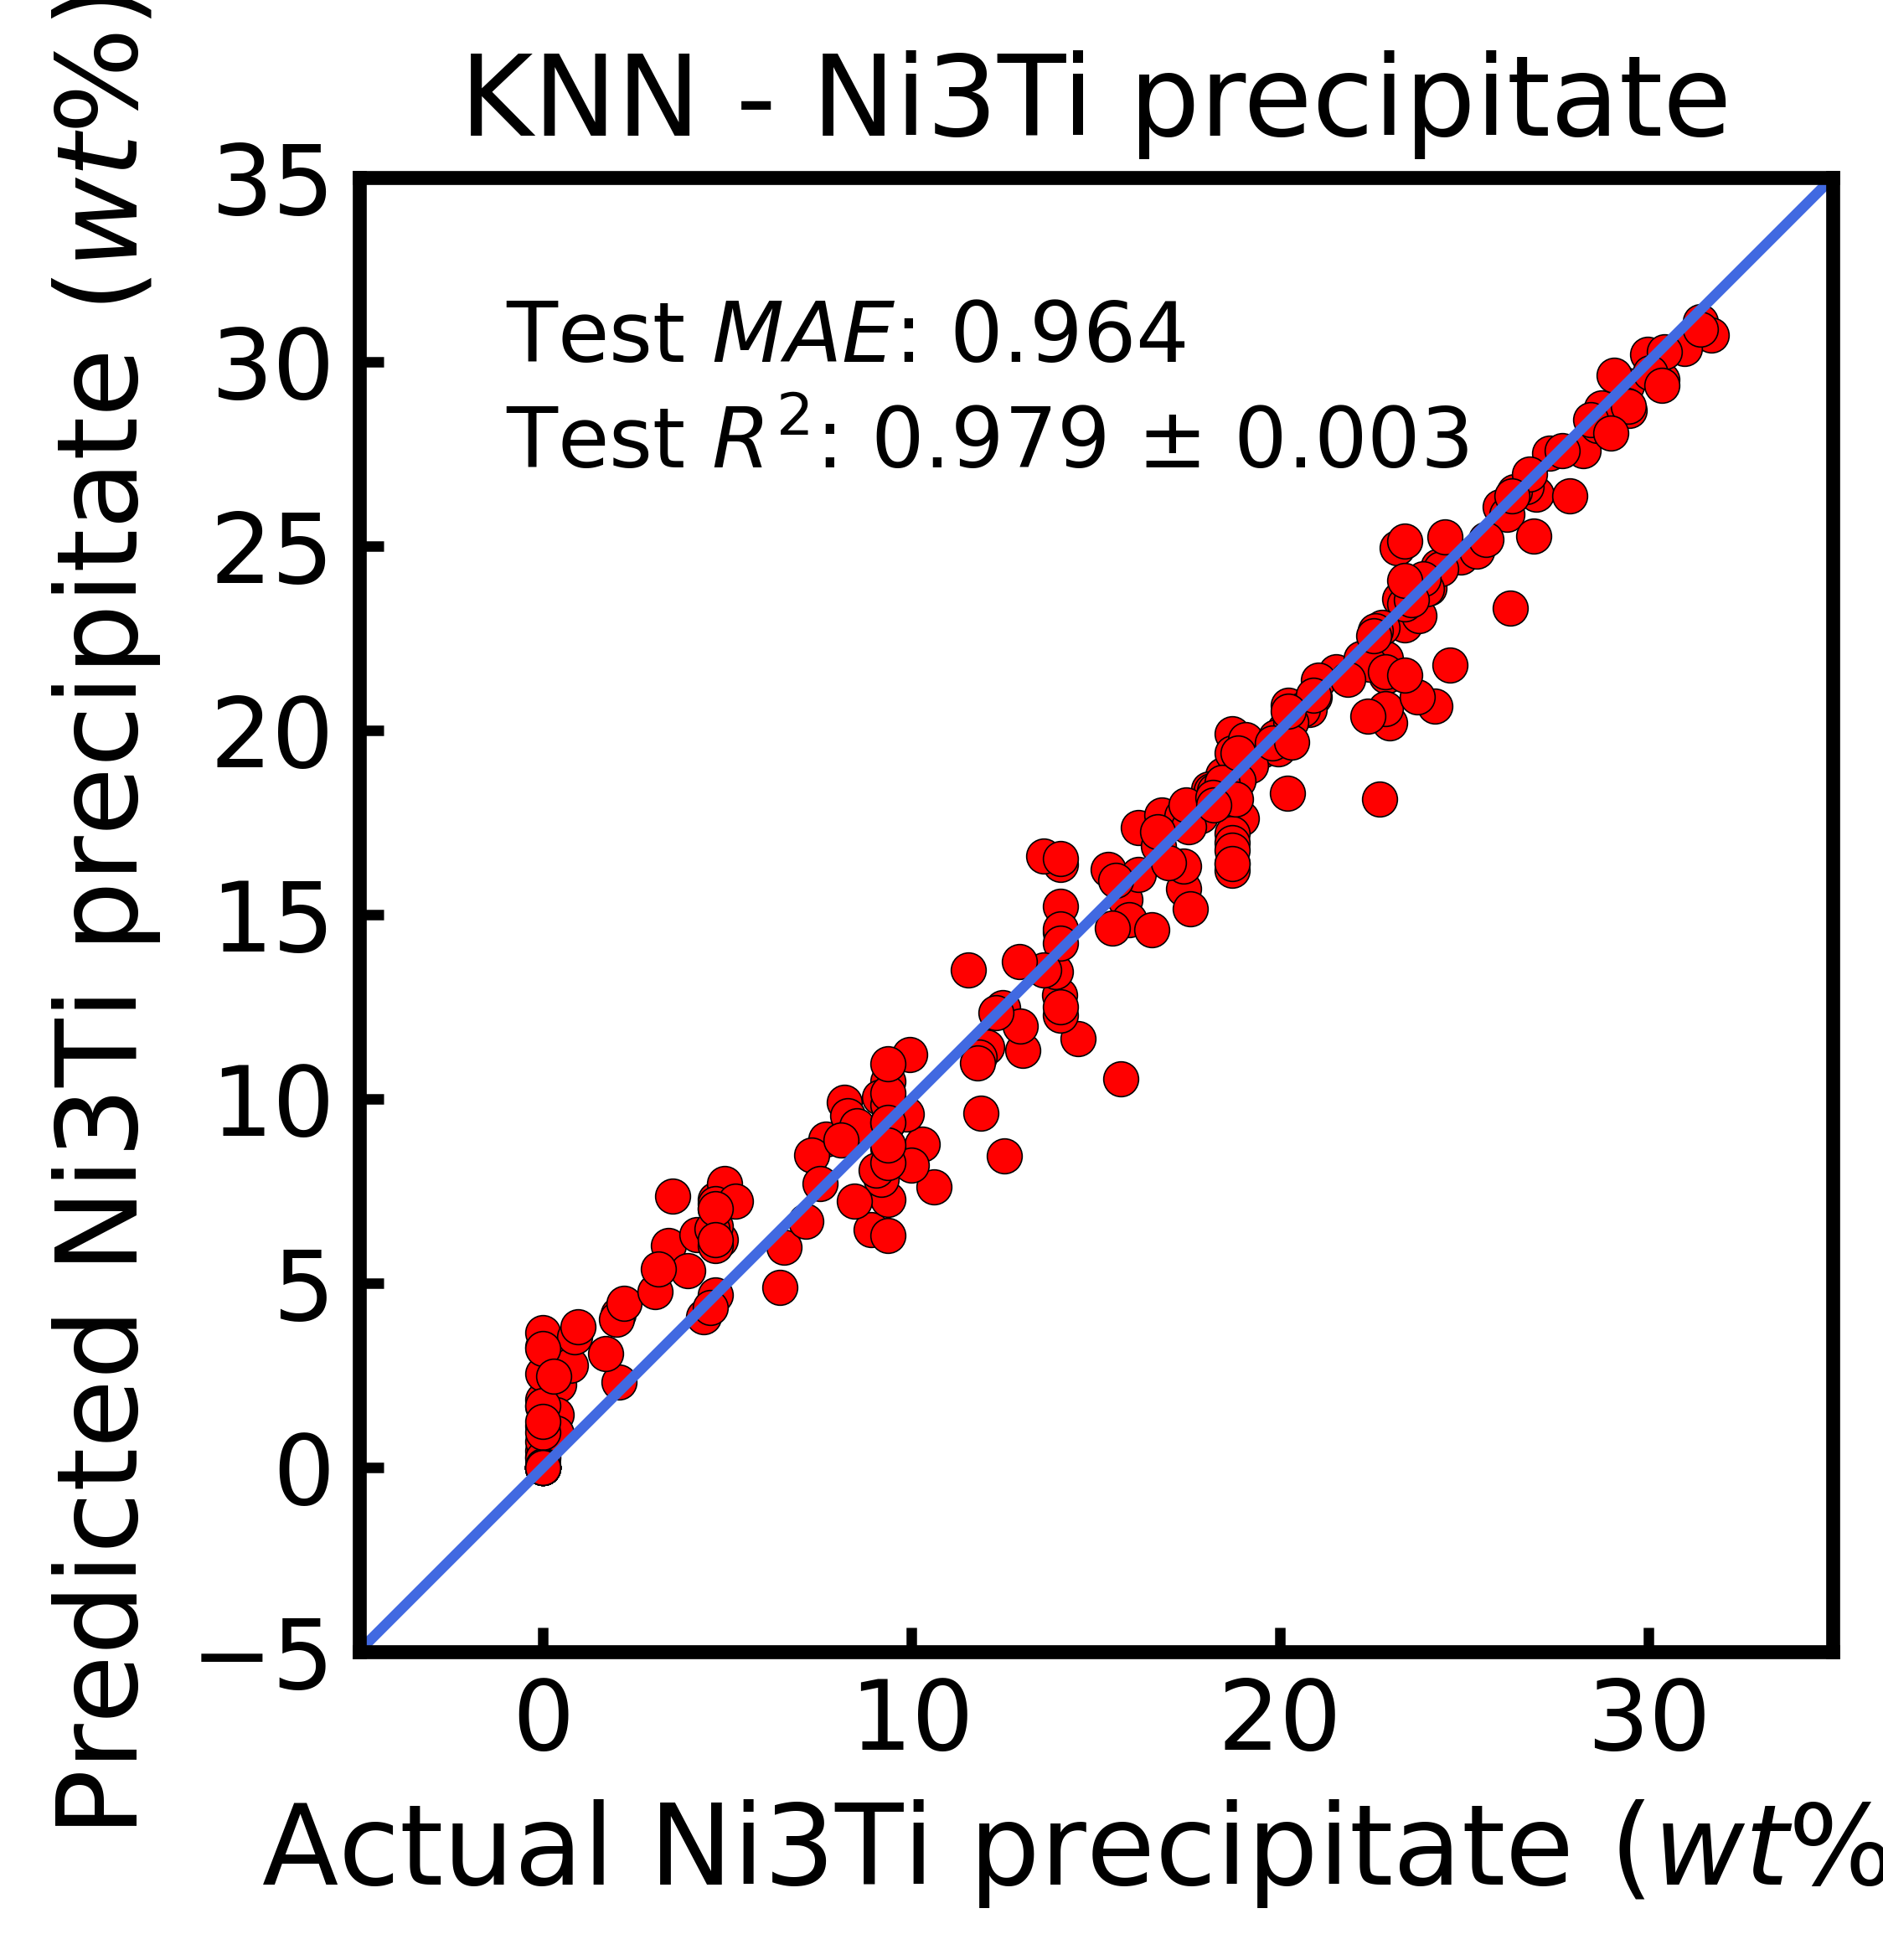

Saving figure Ni3Ti precipitateAdaBoost_test_.png


<Figure size 640x480 with 0 Axes>

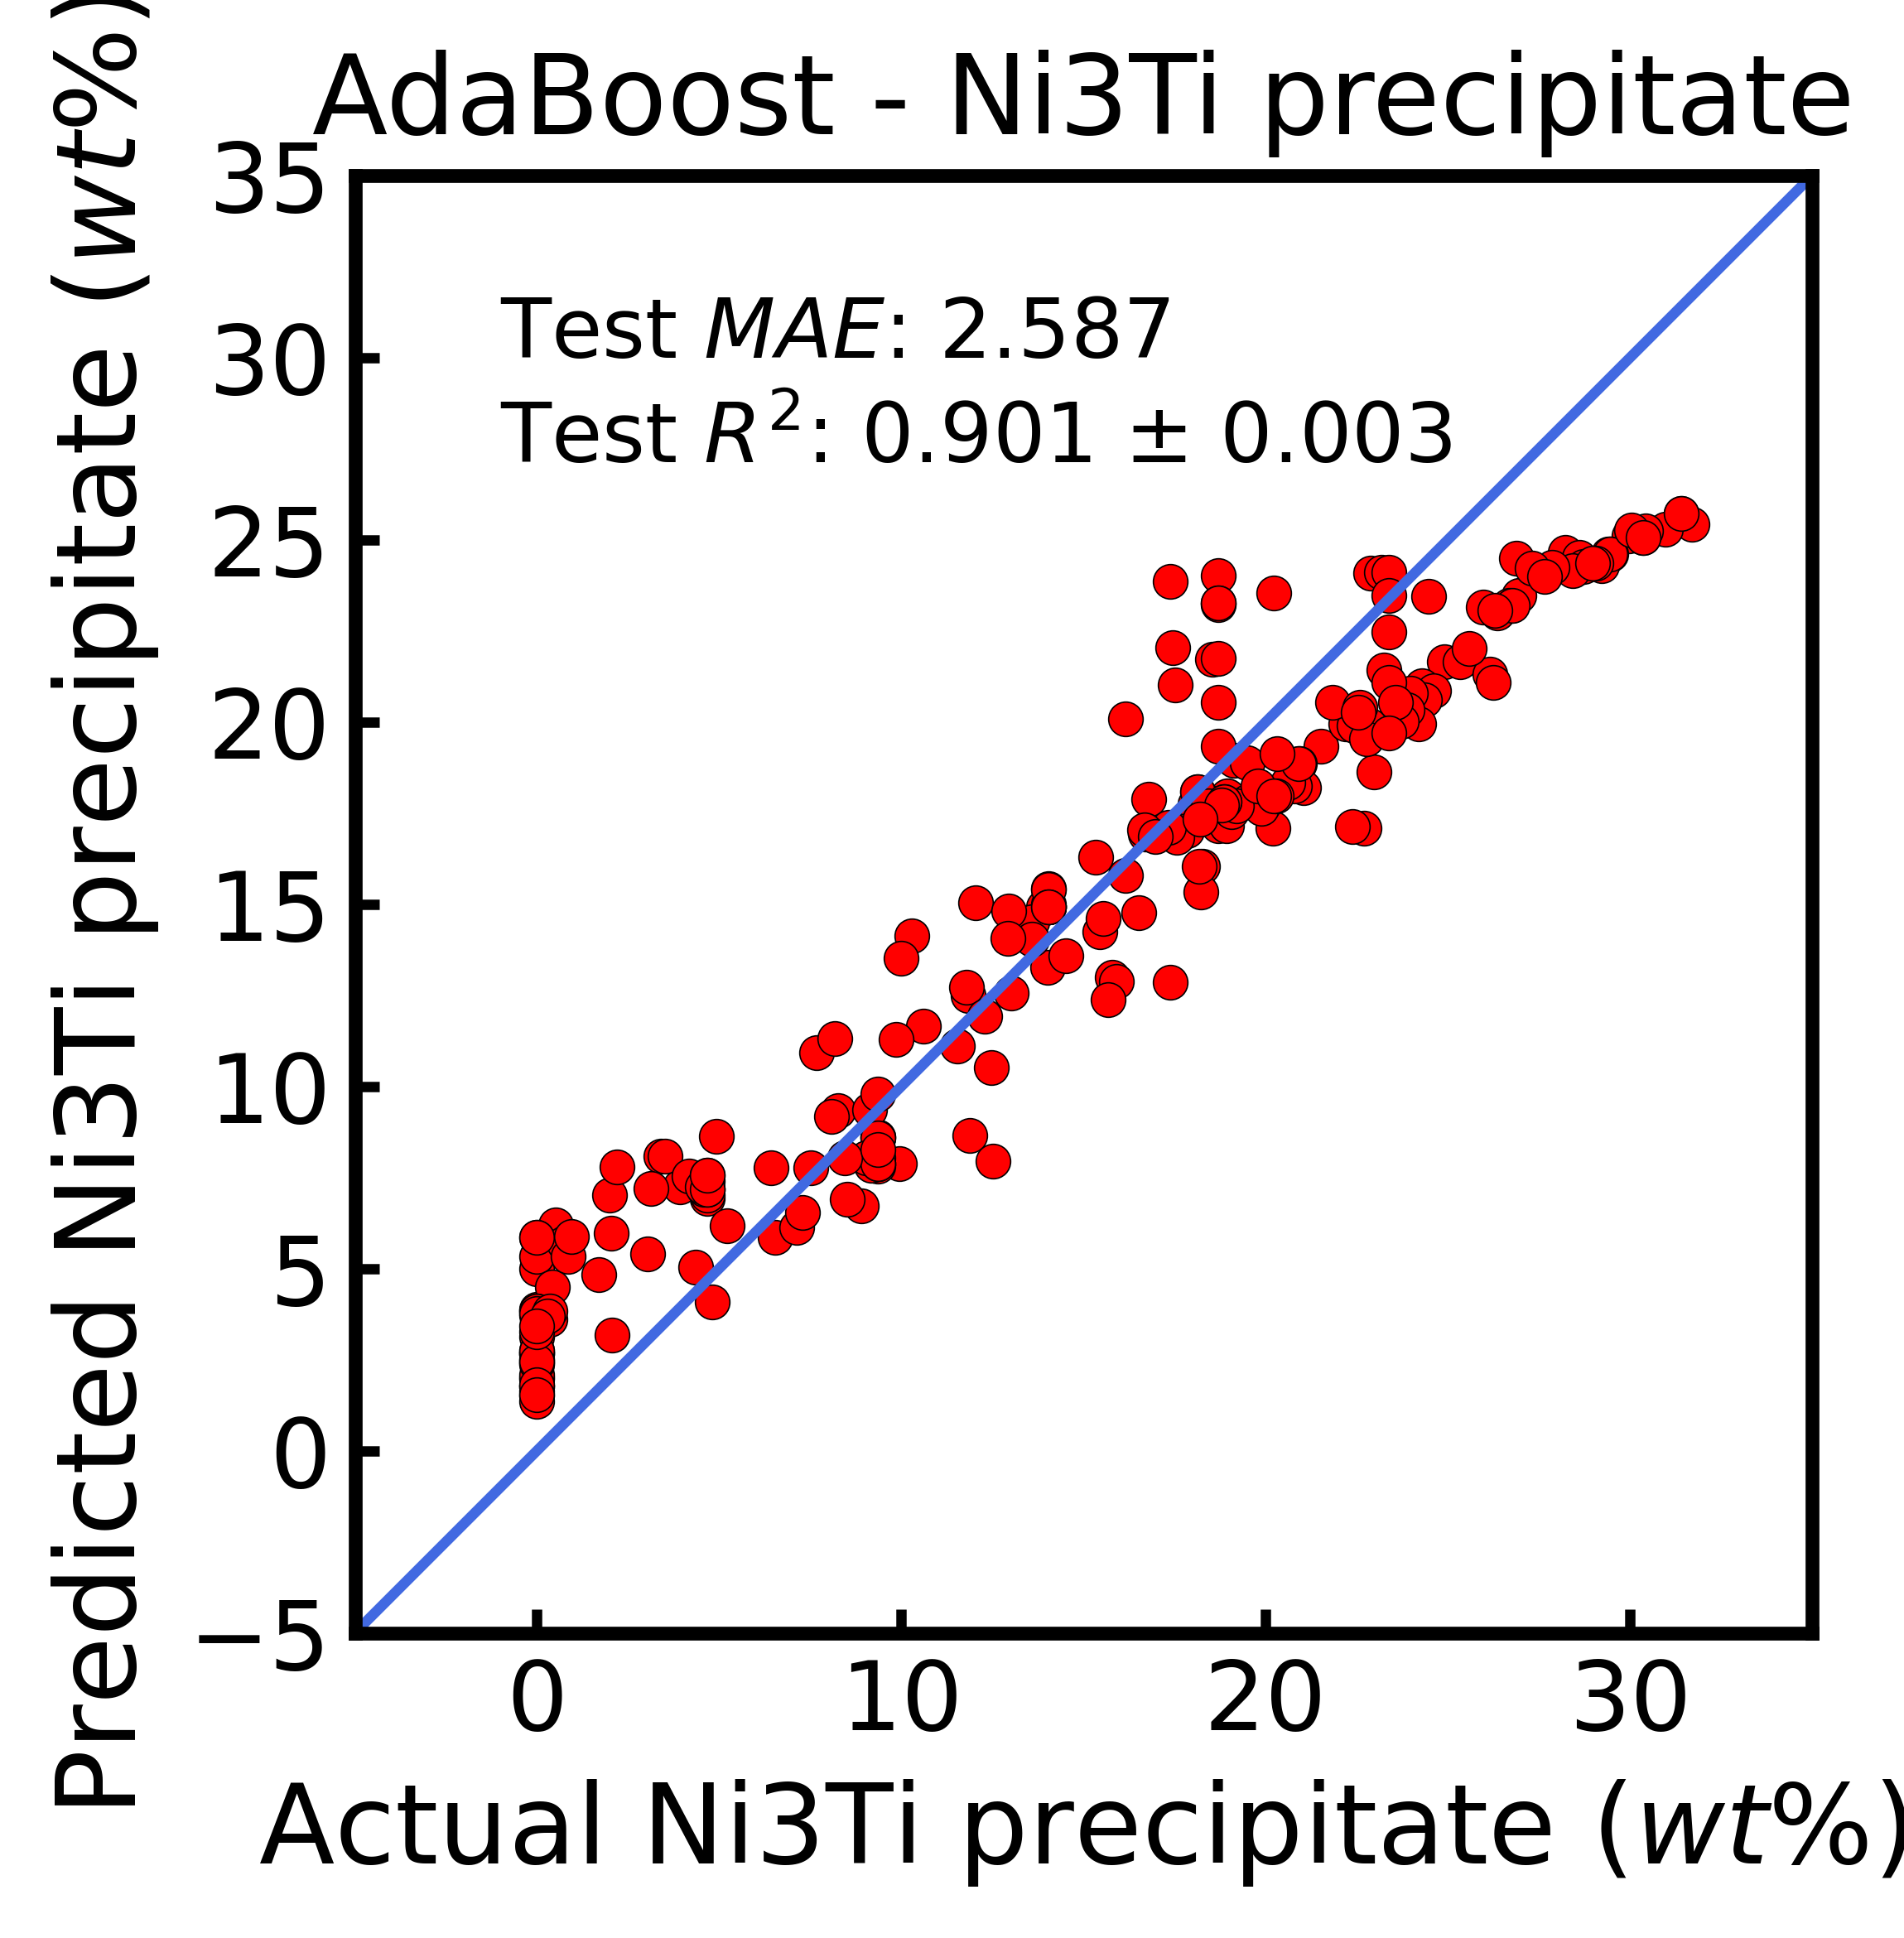

Saving figure Ni3Ti precipitateDT_test_.png


<Figure size 640x480 with 0 Axes>

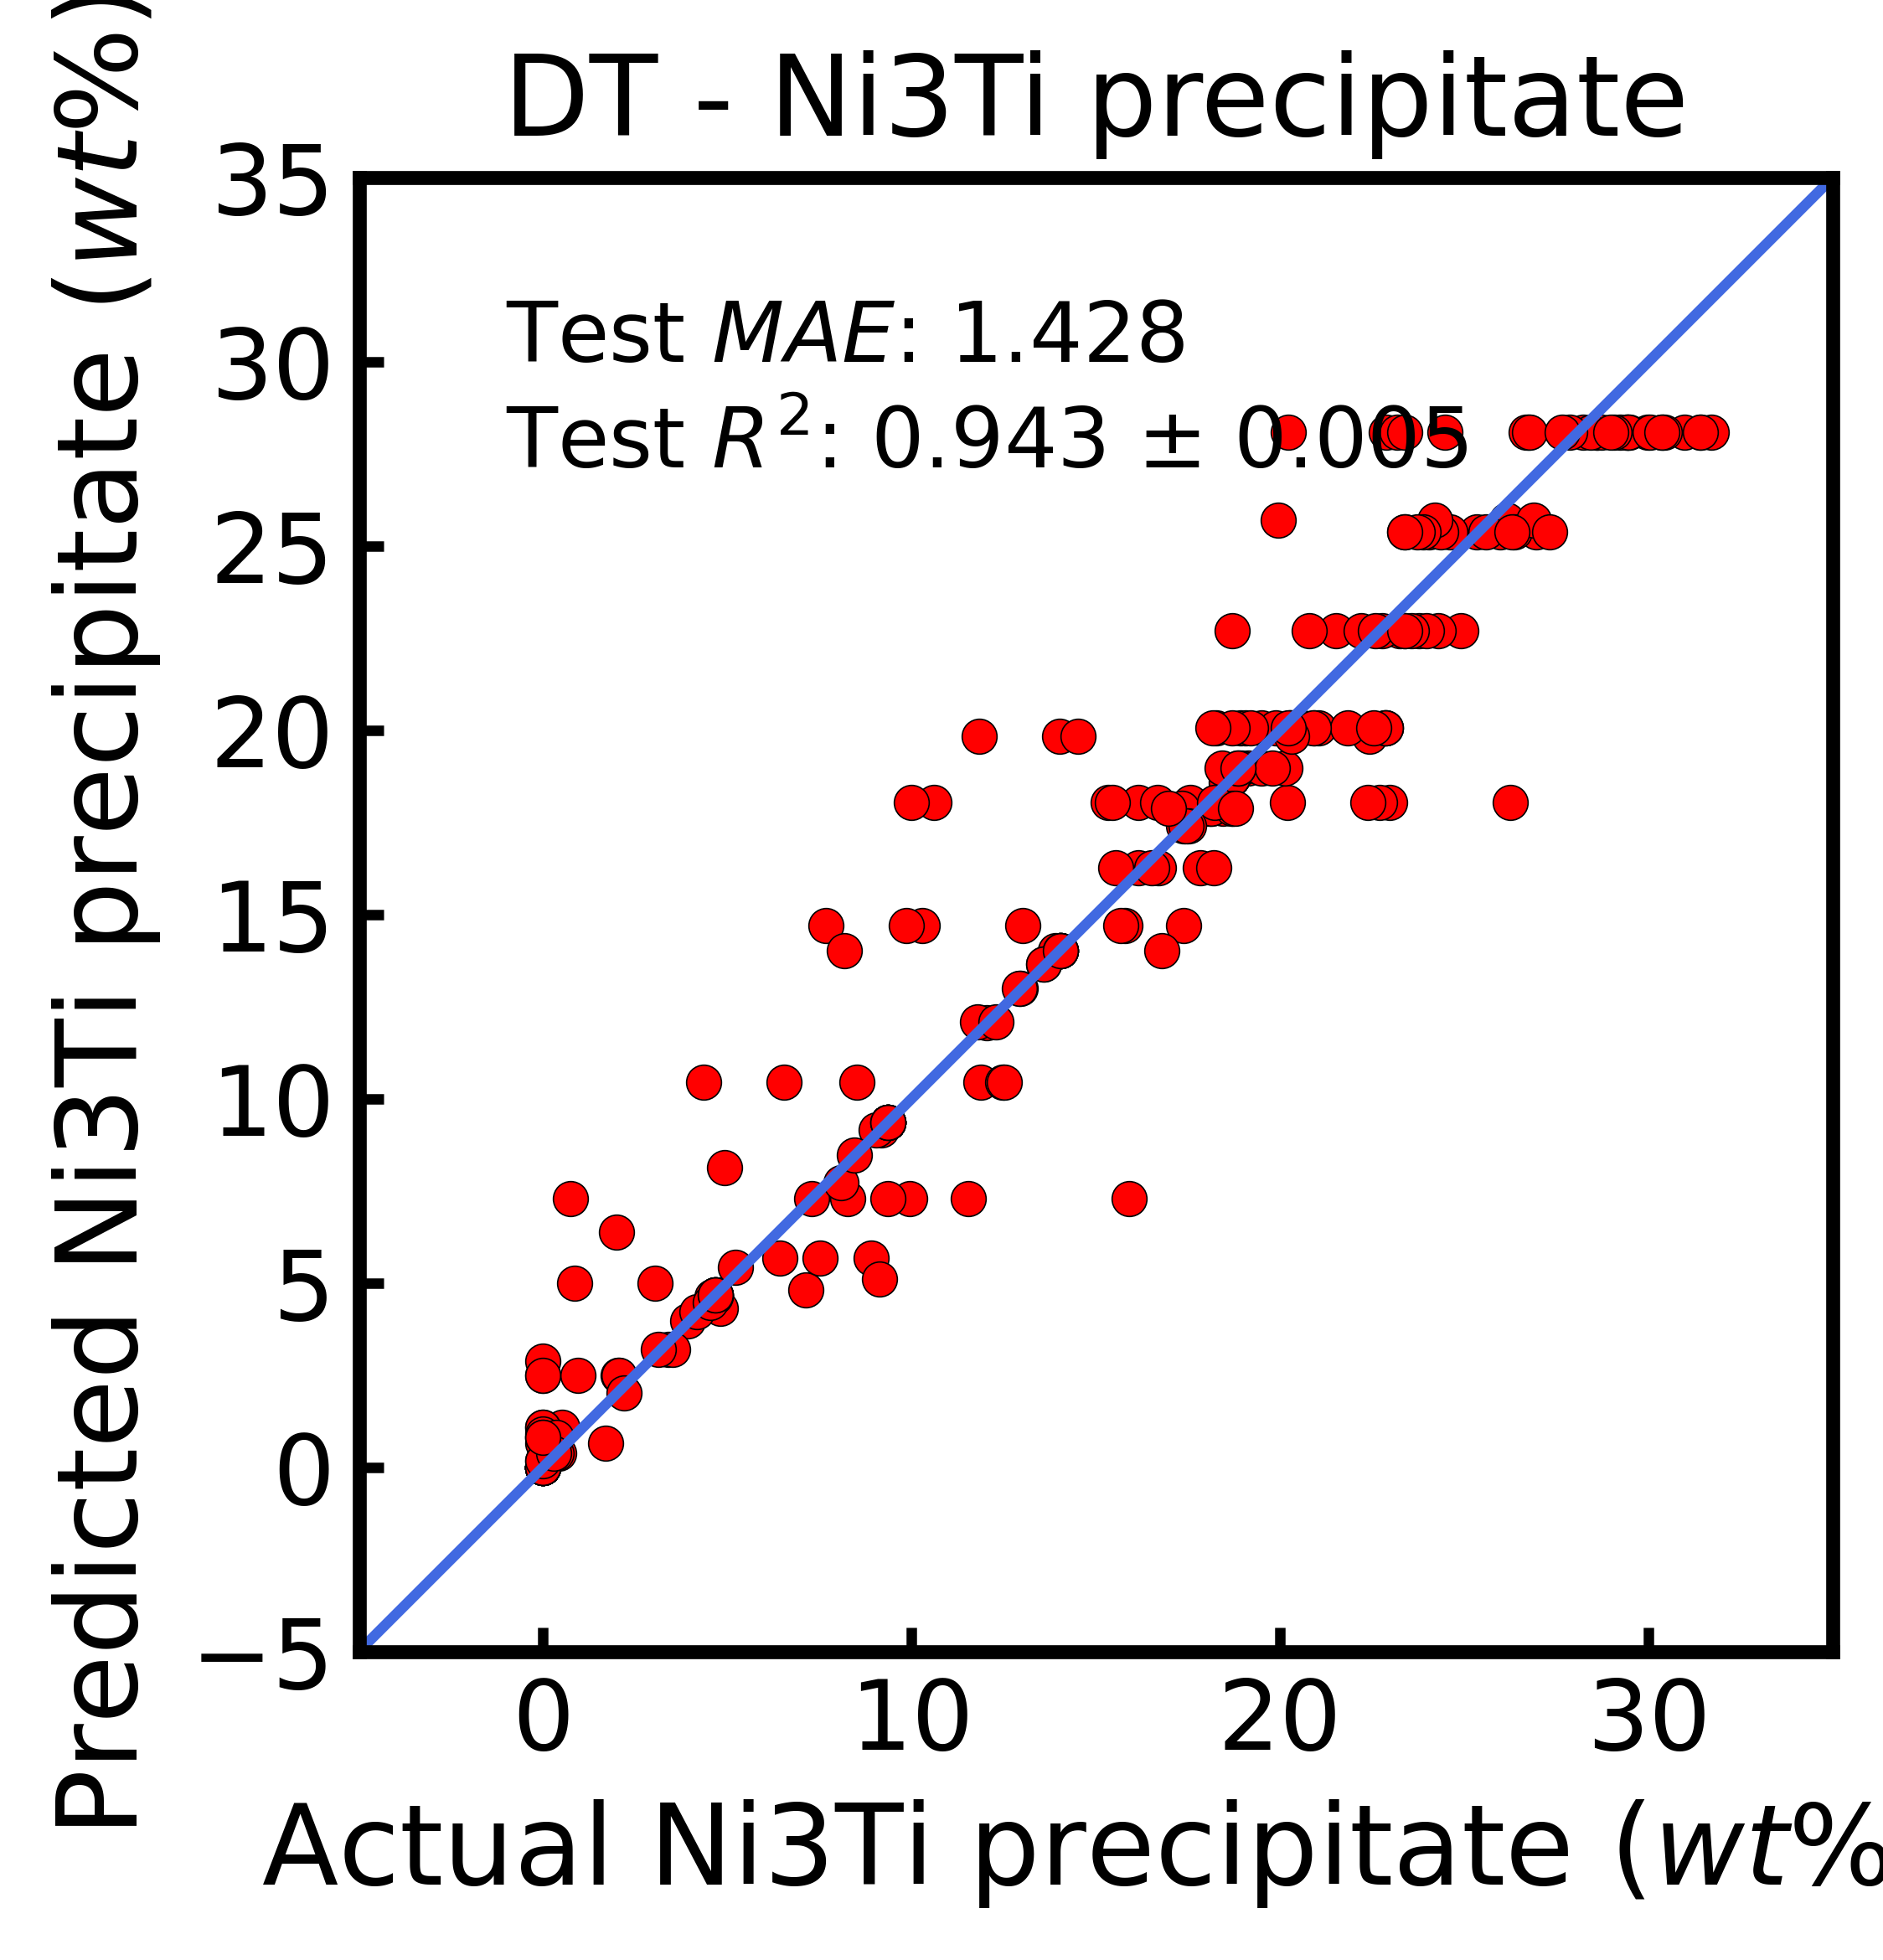

Saving figure Ni3Ti precipitateRF_test_.png


<Figure size 640x480 with 0 Axes>

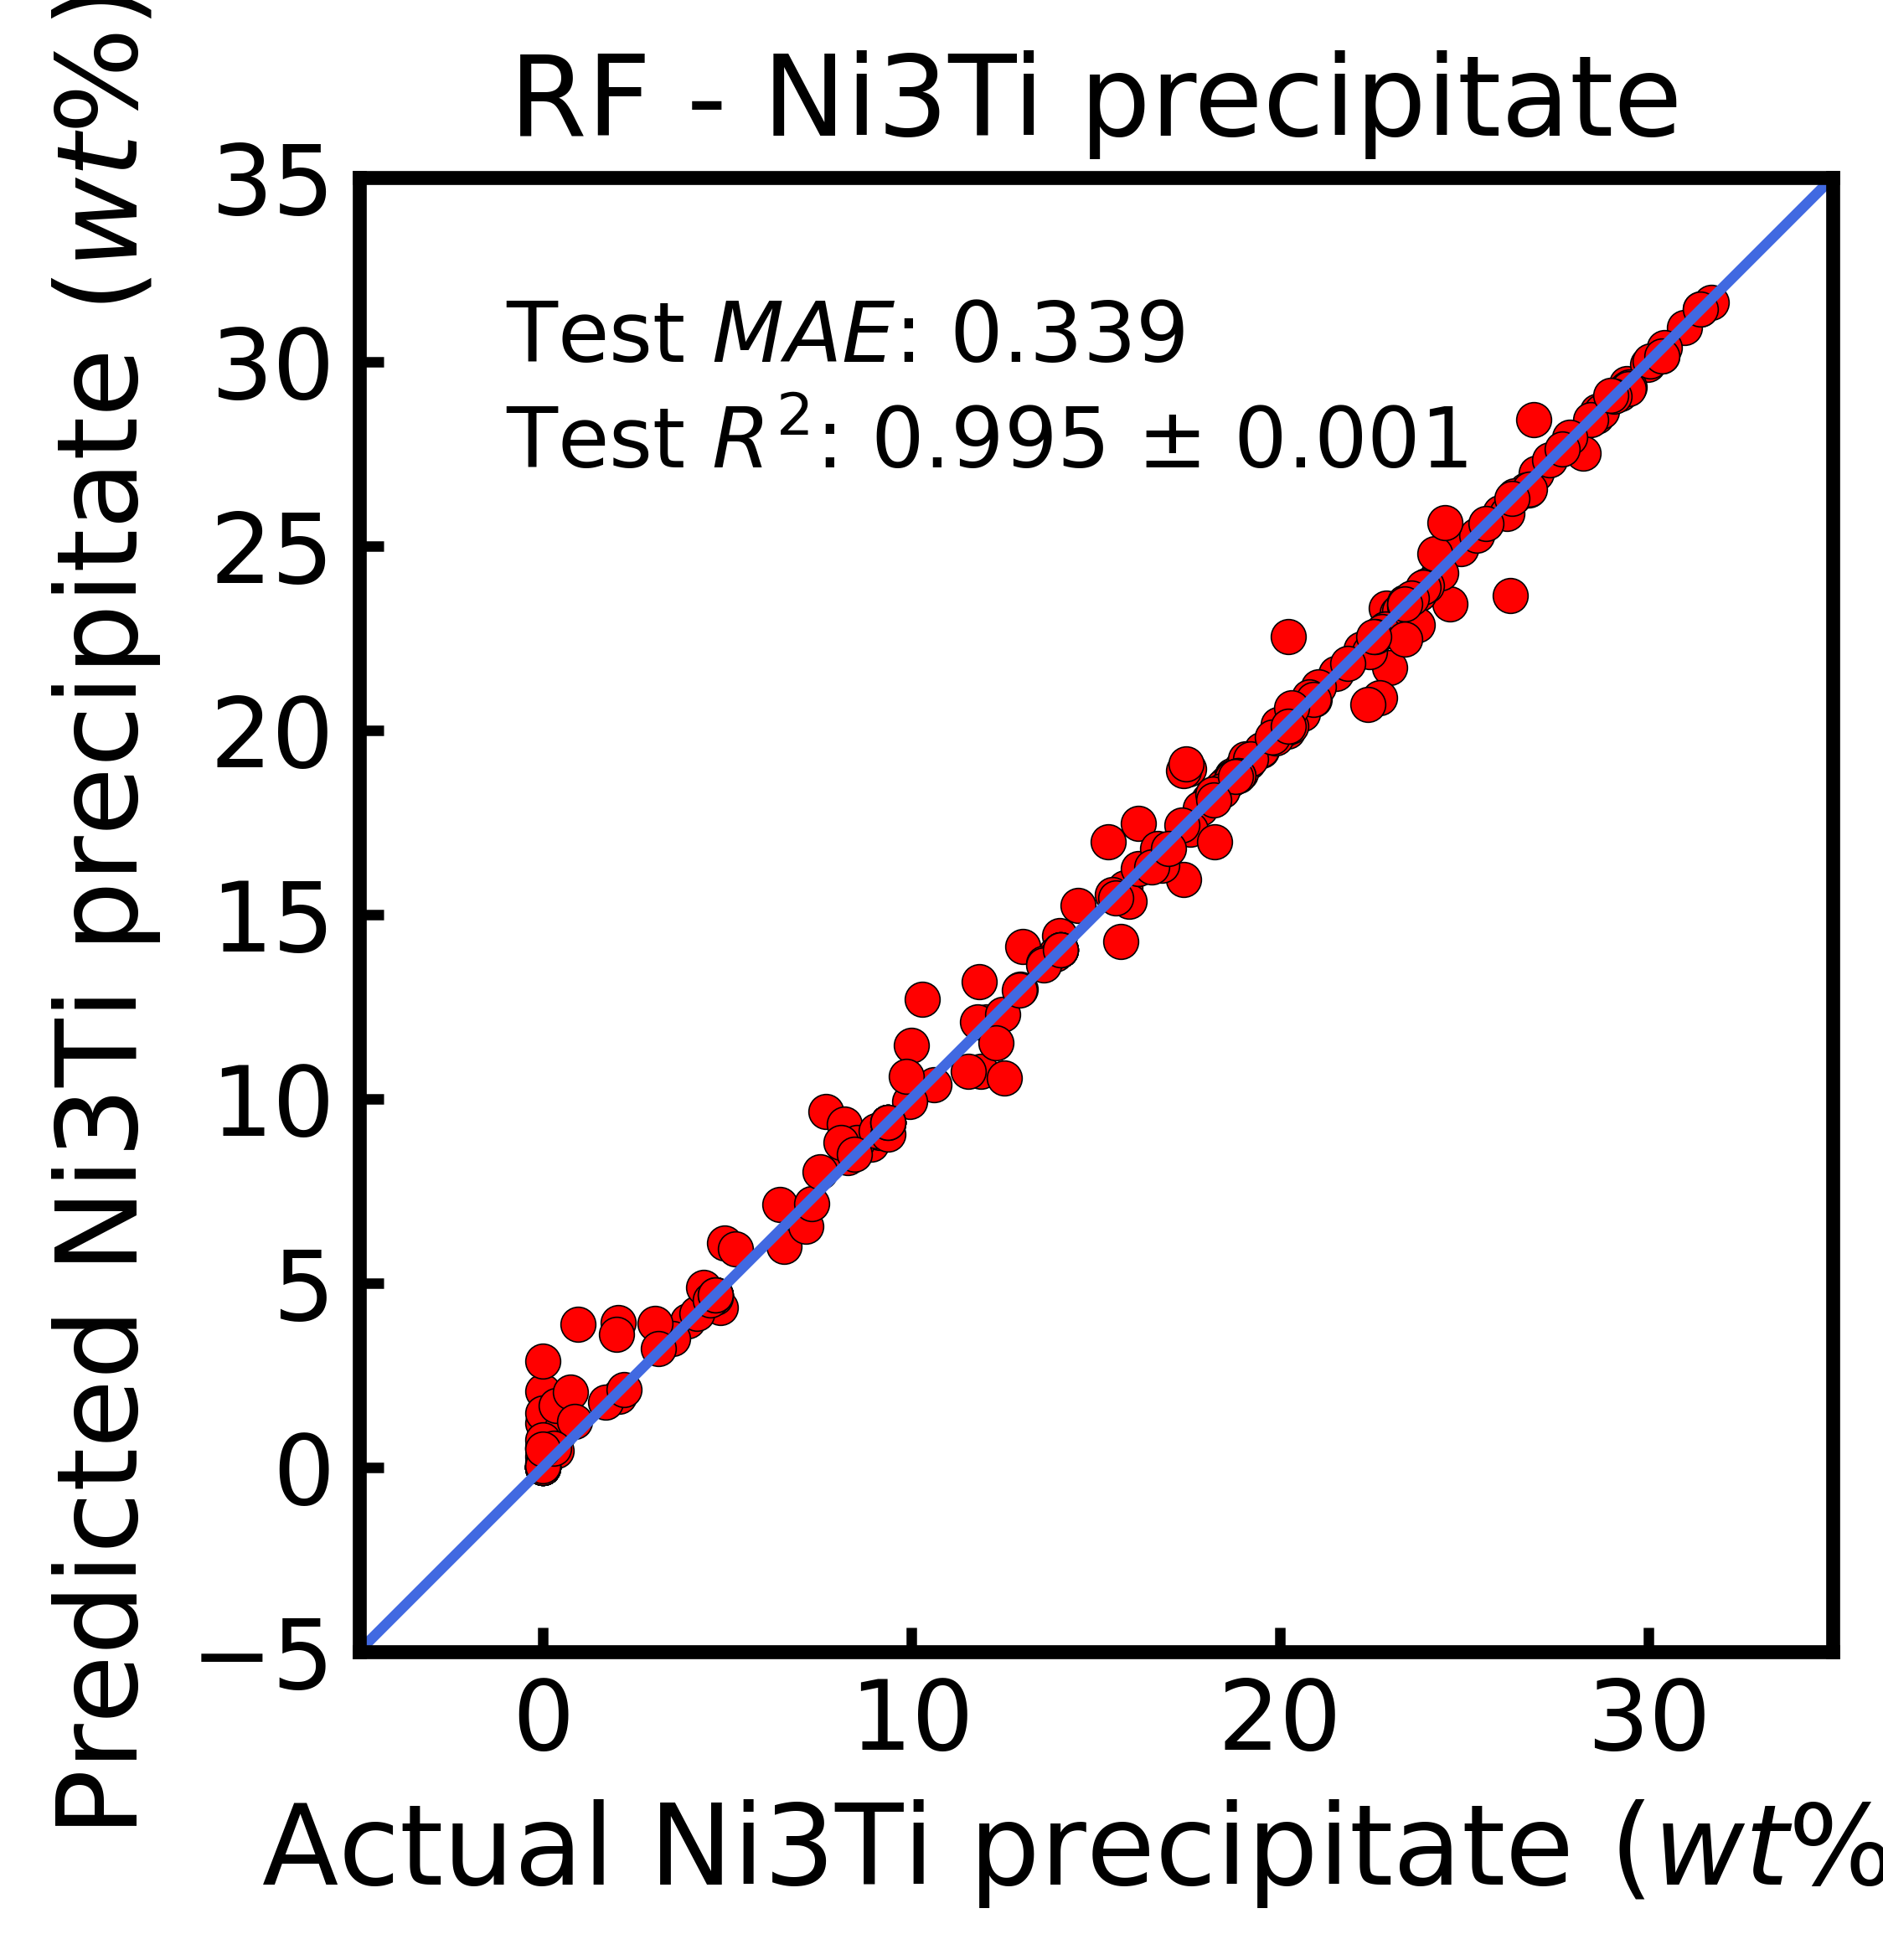

<Figure size 640x480 with 0 Axes>

In [28]:
# Iterate over implemented models
for modeltoggle in ['KNN', 'AdaBoost', 'DT', 'RF']: #'SVR'
    X_train = X_Ni3Ti_train_transformed
    y_train = Y_Ni3Ti_train
    title = "Ni3Ti precipitate"
    
    if modeltoggle == 'RF':
        model = metamodel_Ni3Ti_RF
    elif modeltoggle == 'KNN':
        model = metamodel_Ni3Ti_KNN
    elif modeltoggle == 'AdaBoost':
        model = metamodel_Ni3Ti_AdaBoost
    elif modeltoggle == 'DT':
        model = metamodel_Ni3Ti_DT
        
    # Perform cross validation for each model
    kf = KFold(n_splits=5)
    trains = []
    tests = []
    train_maes = []
    test_maes = []
    # Perform cross validation for each model
    for train, test in kf.split(X_train):

        # Shuffle data points before prediction
        X_shuffle, y_shuffle = shuffle(X_train, y_train, random_state=0)

        X_cv_train = X_shuffle[train]
        X_cv_test = X_shuffle[test]
        y_cv_train = y_shuffle[train]
        y_cv_test = y_shuffle[test]

        model.fit(X_cv_train, y_cv_train)

        # Calculate MAE and R^2

        y_predtrain = model.predict(X_cv_train)
        y_predtest = model.predict(X_cv_test)
        # R^2 score:
        trains.append(model.score(X_cv_train, y_cv_train))
        tests.append(model.score(X_cv_test, y_cv_test))
        
        # MAE score:
        mae_test = metrics.mean_absolute_error(y_cv_test, y_predtest)
        mae_train = metrics.mean_absolute_error(y_cv_train, y_predtrain)
        train_maes.append(mae_train)
        test_maes.append(mae_test)

    # Aggregate information
    trains = np.array(trains)
    tests = np.array(tests)
    train_maes = np.array(train_maes)
    test_maes = np.array(test_maes)
    
    r2_mean = tests.mean()
    r2_std = tests.std()
    r2_train_mean = trains.mean()
    r2_train_std =  trains.std()

    mae_mean_train = train_maes.mean()
    mae_mean_test = test_maes.mean()
    mae_mean_train_std = train_maes.std()
    mae_mean_test_std = test_maes.std()

    Ni3Ti_train_accuracy.append(r2_train_mean)
    Ni3Ti_train_accuracy_std.append(r2_train_std)
    Ni3Ti_test_accuracy_std.append(r2_std)
    Ni3Ti_test_accuracy.append(r2_mean)

    Ni3Ti_train_mae.append(mae_mean_train)
    Ni3Ti_train_mae_std.append(mae_mean_train_std)
    Ni3Ti_test_mae.append(mae_mean_test)
    Ni3Ti_test_mae_std.append(mae_mean_test_std)
    
    ####### ----------------------------- R^2 plots-----------------------#######
    fig = plt.figure(figsize = (4,4), dpi = 600)
    widths = 2
    ax = gca()
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(widths)

        tick_width = 1.5
    plt.tick_params(direction = 'in', width = tick_width)
    plt.plot(y_cv_test, y_predtest, '.',color='red', ms = 10, mec='k', mew = 0.2) ##8B0000
    plt.xlim([-5, 35])
    plt.ylim([-5, 35])
    plt.plot(np.arange(-4*np.std(y_cv_train)+np.mean(y_cv_train), 4*np.std(y_cv_train)+np.mean(y_cv_train)), 
             np.arange(-4*np.std(y_cv_train)+np.mean(y_cv_train),4*np.std(y_cv_train)+np.mean(y_cv_train)), 'royalblue')
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    
    plt.title(modeltoggle + " - "+ str(title), fontsize = 16)
    plt.xlabel("Actual Ni3Ti precipitate $(wt\%)$", fontsize = 16)
    plt.ylabel("Predicted Ni3Ti precipitate $(wt\%)$", fontsize = 16)
    s_cv =  'Test $R^2$: {:.3f} ± {:.3f}'.format(r2_mean, r2_std)
    plt.text(-1, 1.3*np.std(y_cv_train)+np.mean(y_cv_train), s_cv, fontsize=12)
    s =  'Test $MAE$: {:.3f}'.format(mae_mean_test)
    plt.text(-1, 1.6*np.std(y_cv_train)+np.mean(y_cv_train), s, fontsize=12)
    
    plt.gca().set_aspect('equal')
    # frame_tick()
    save_fig(title+modeltoggle + "_test_"+".png")
    plt.show()
    plt.clf()

### metamodel_Laves

In [29]:
# fit_models = []
Laves_train_accuracy = []
Laves_train_accuracy_std = []
Laves_test_accuracy = []
Laves_test_accuracy_std = []
Laves_train_mae=[]
Laves_train_mae_std=[]
Laves_test_mae=[]
Laves_test_mae_std=[]

Saving figure Laves phaseKNN_test_.png


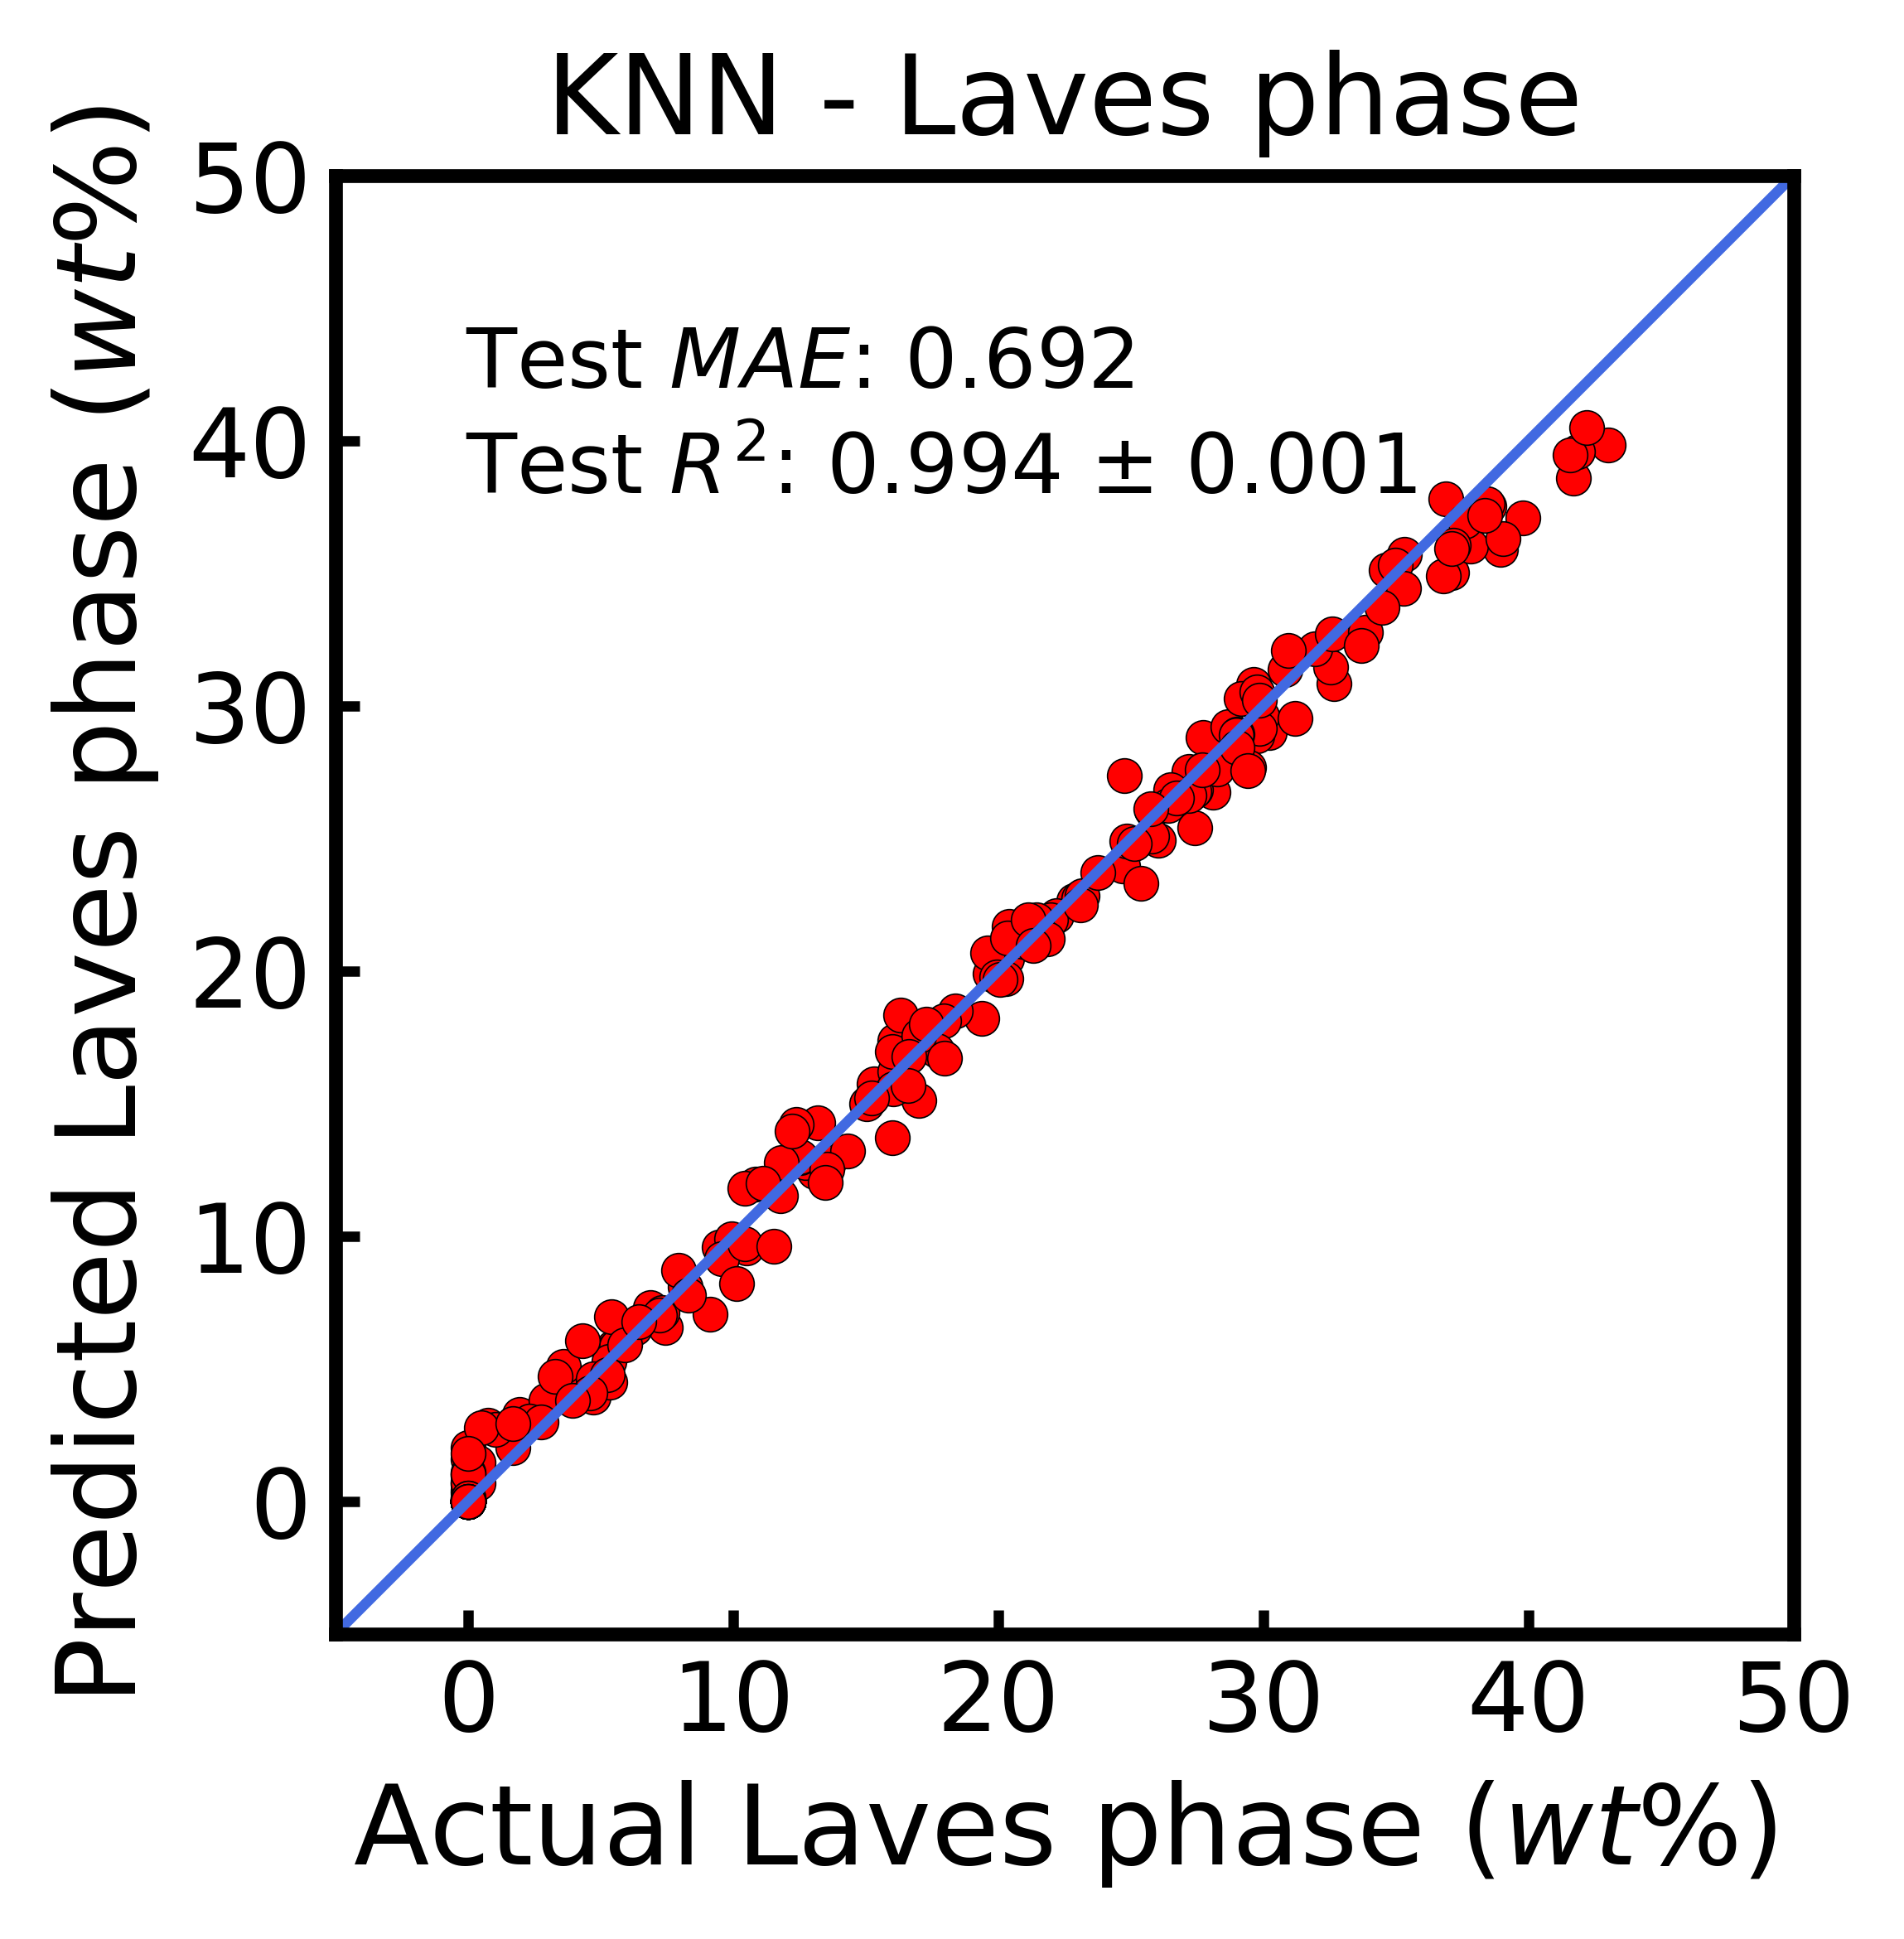

Saving figure Laves phaseAdaBoost_test_.png


<Figure size 640x480 with 0 Axes>

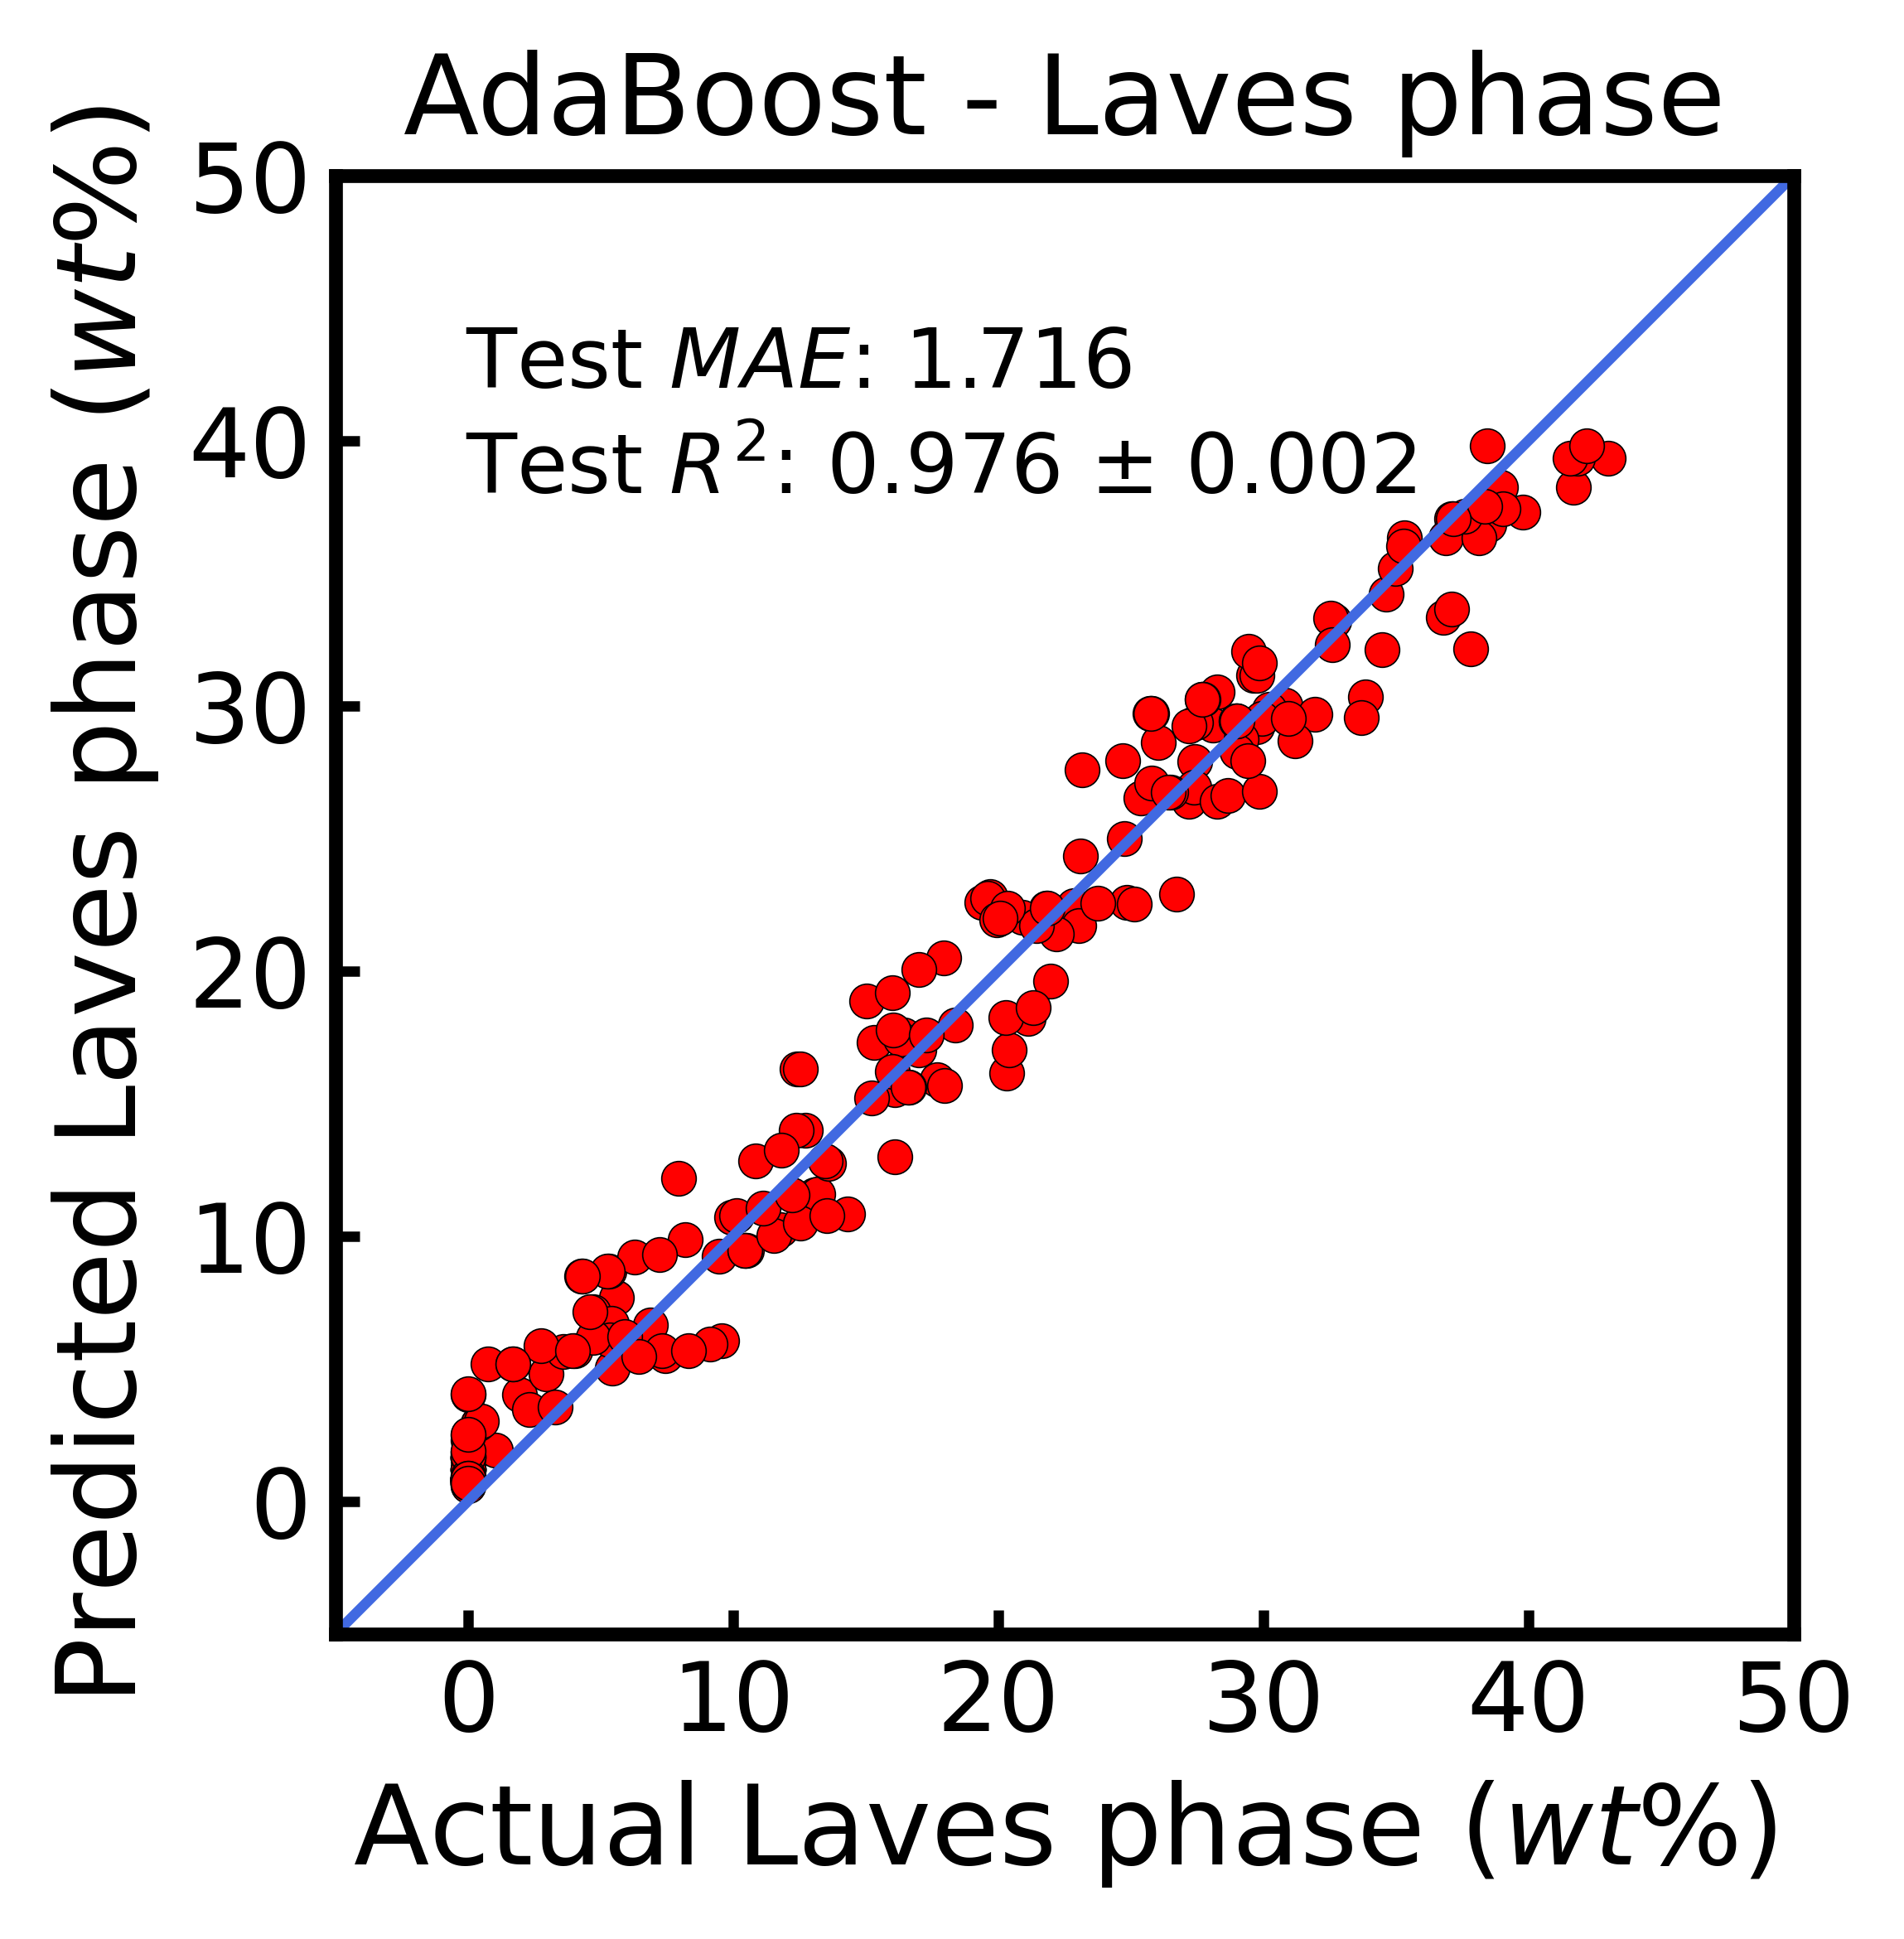

Saving figure Laves phaseDT_test_.png


<Figure size 640x480 with 0 Axes>

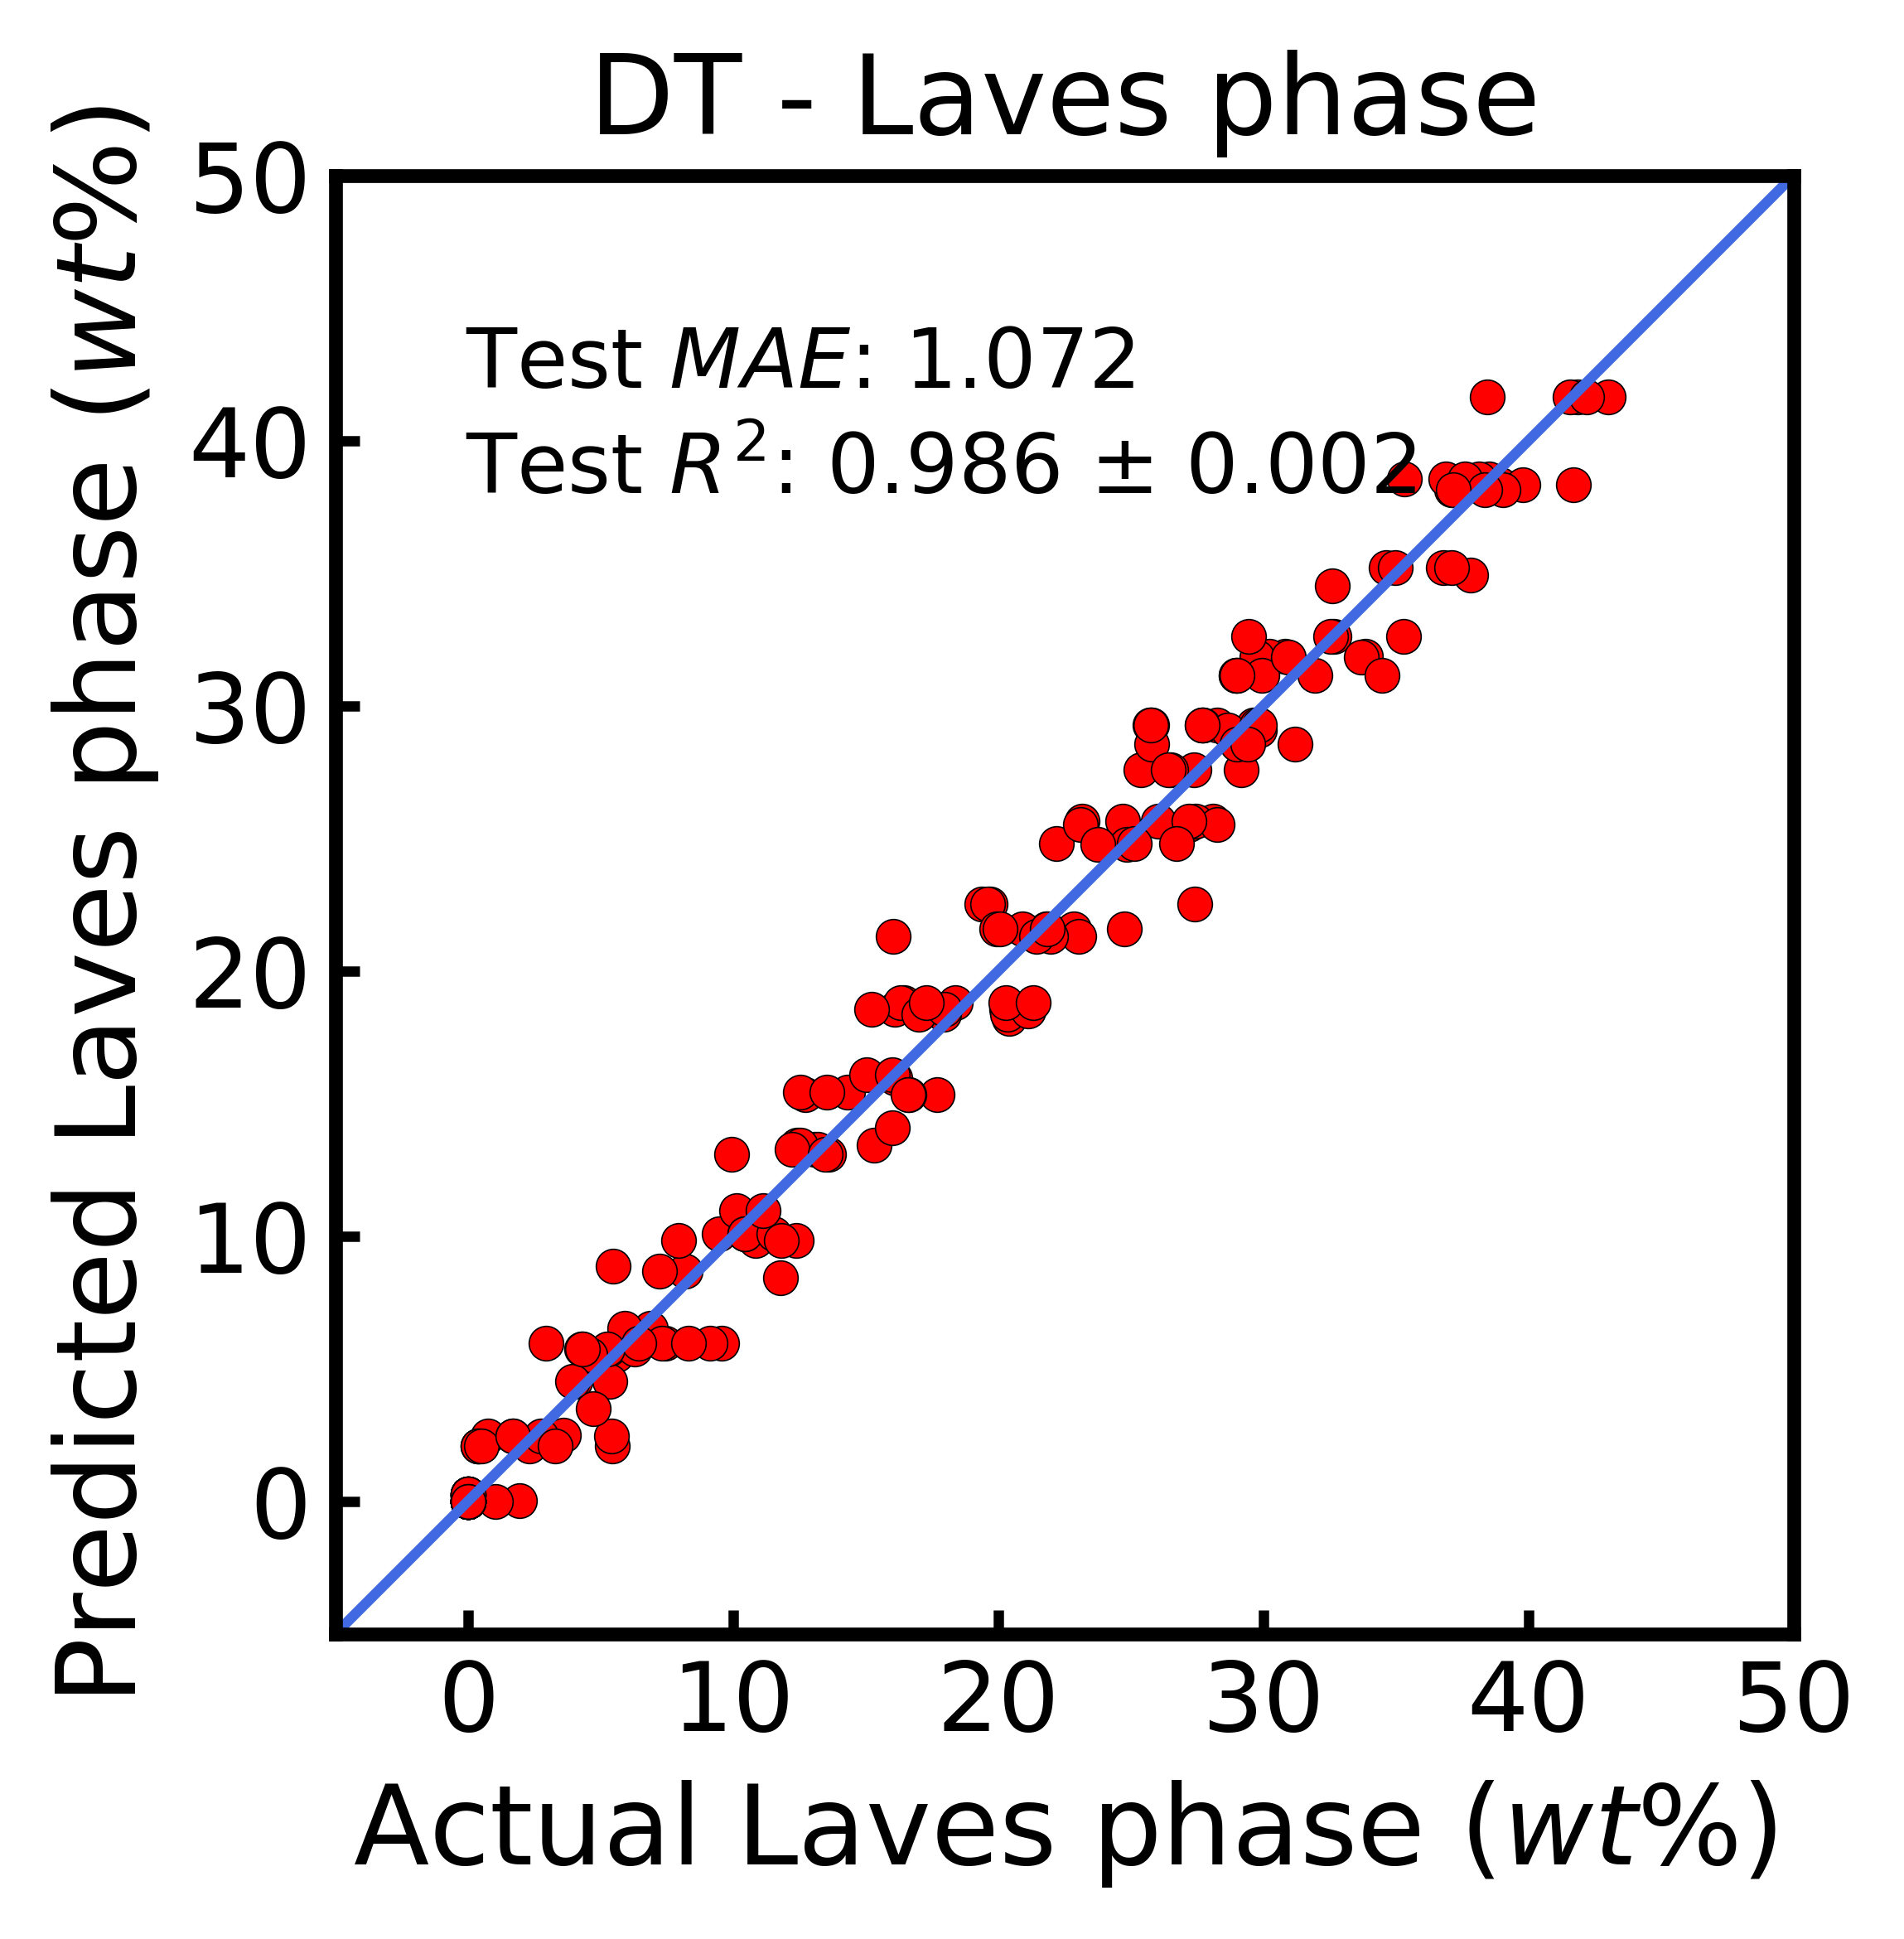

Saving figure Laves phaseRF_test_.png


<Figure size 640x480 with 0 Axes>

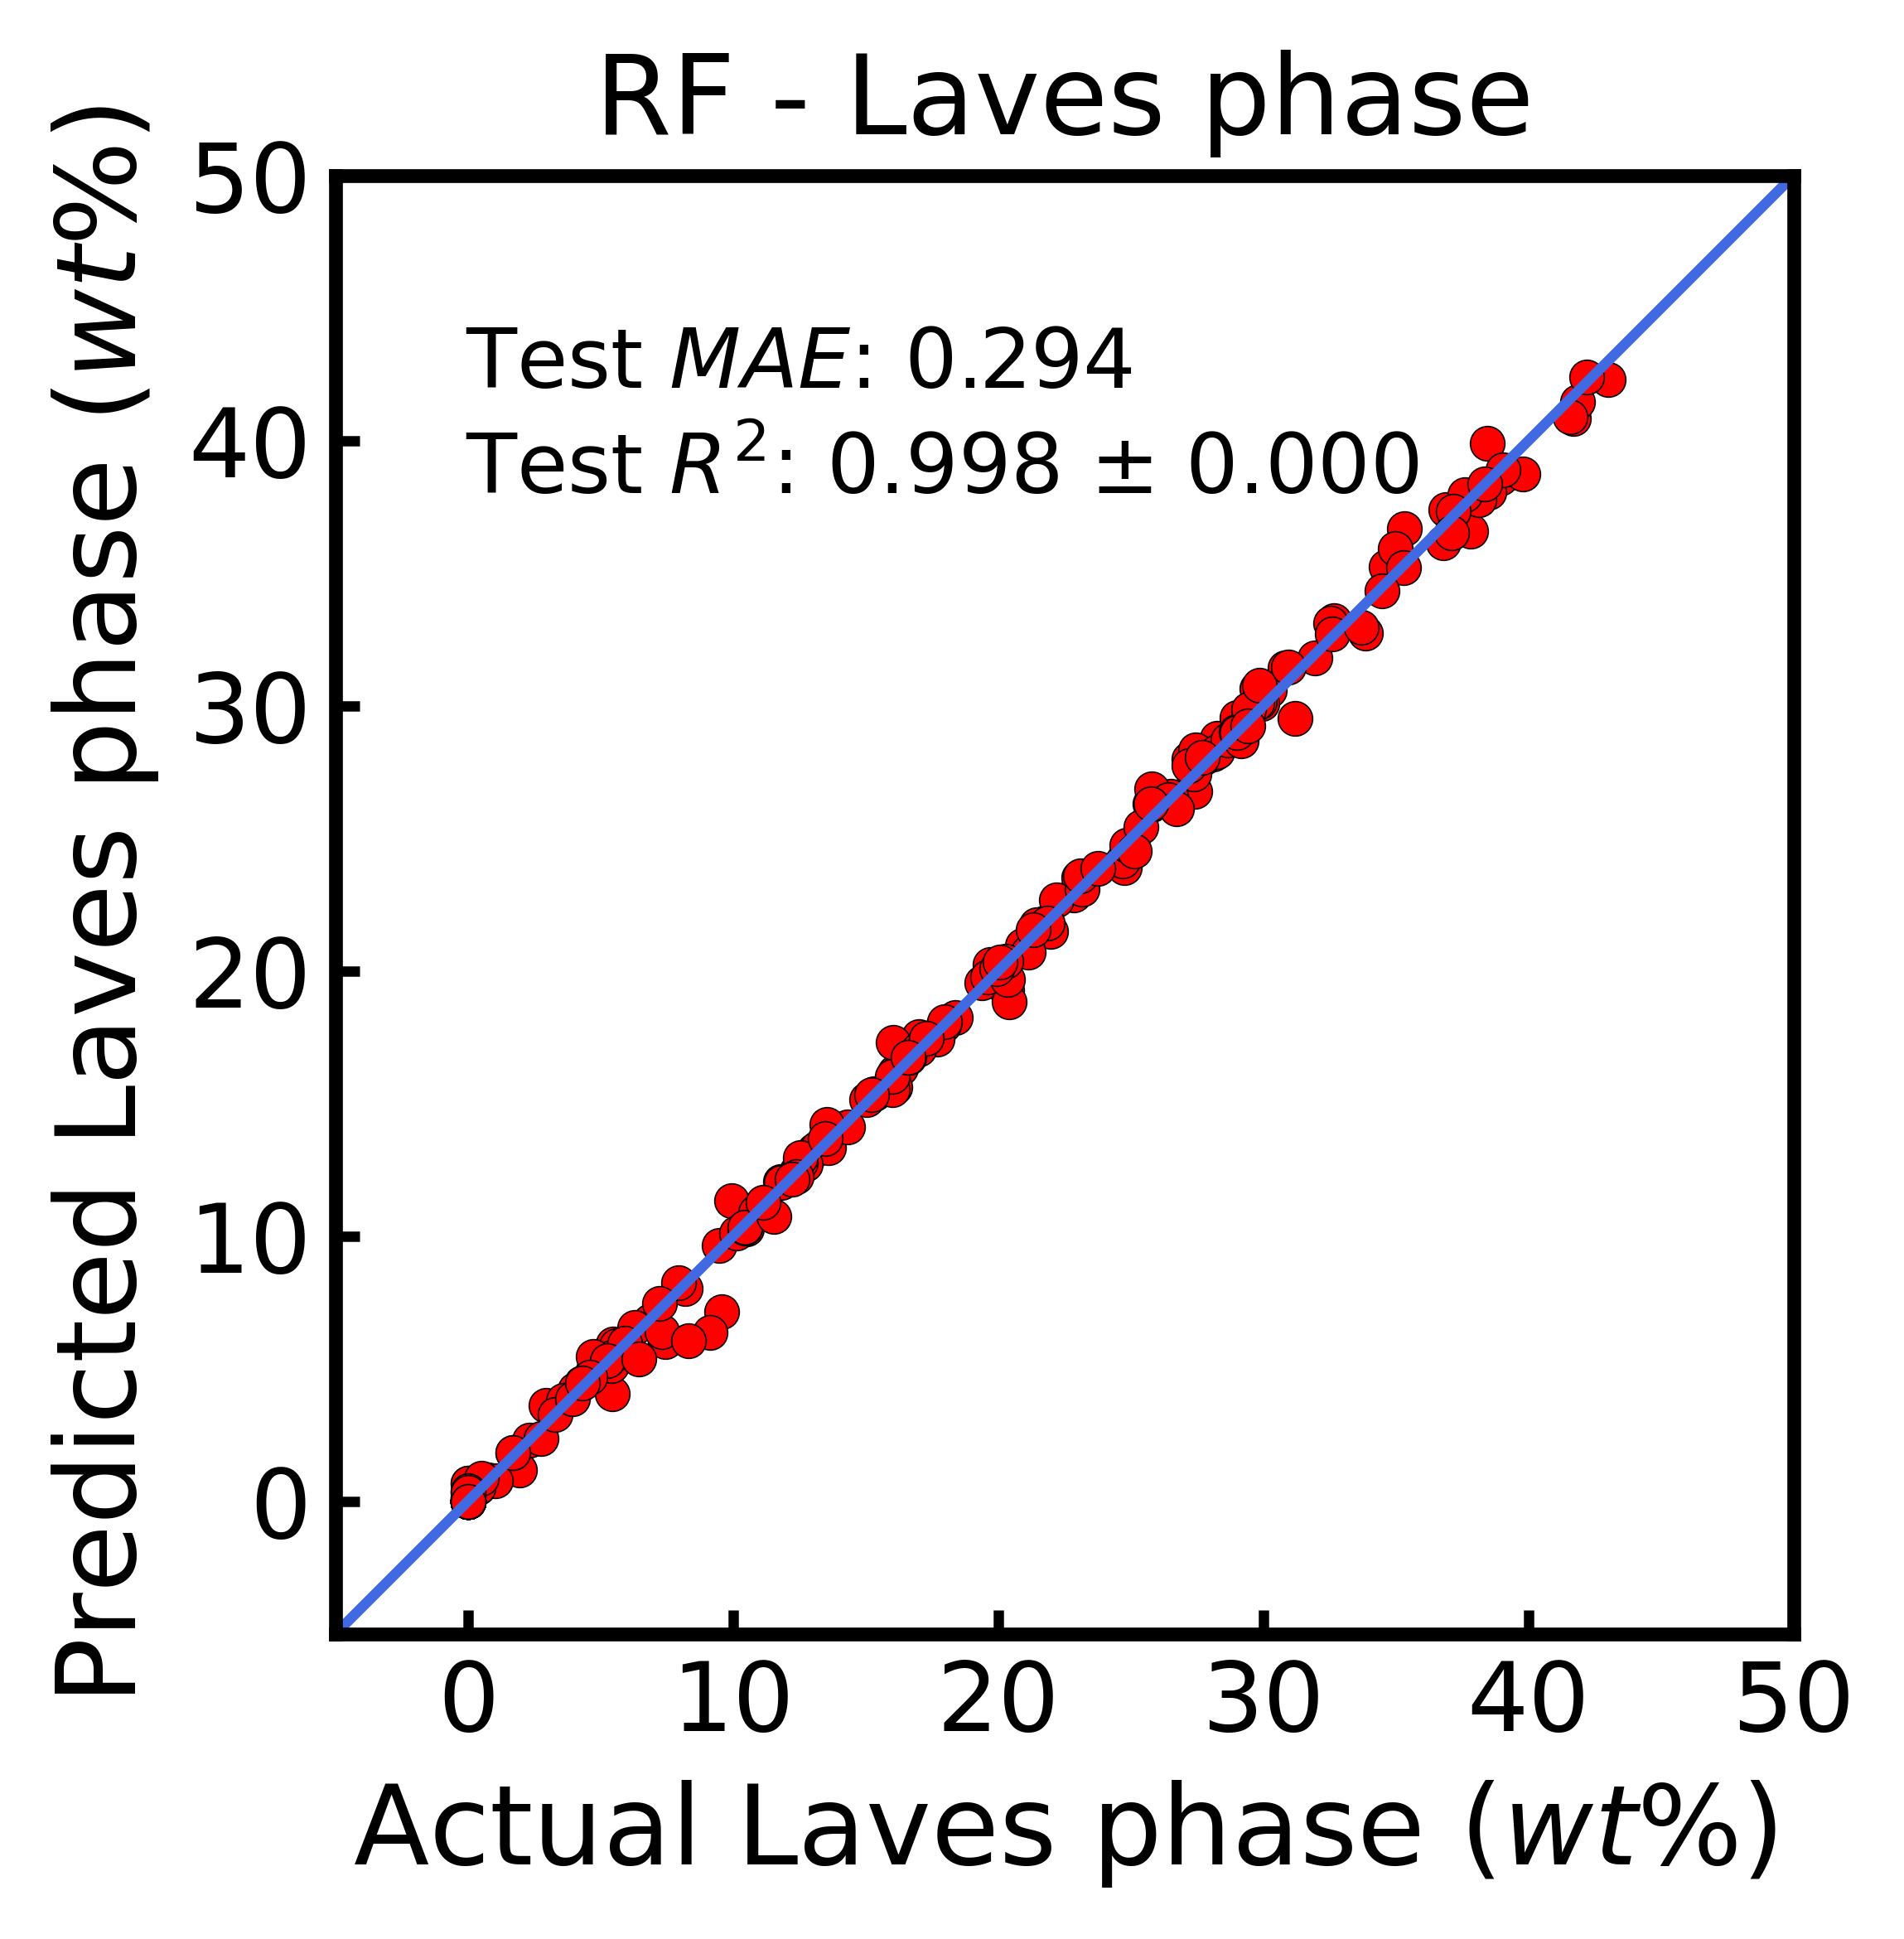

<Figure size 640x480 with 0 Axes>

In [30]:
# Iterate over implemented models
for modeltoggle in ['KNN', 'AdaBoost', 'DT', 'RF']: #'SVR'
    X_train = X_Laves_train_transformed
    y_train = Y_Laves_train
    
    title = "Laves phase"
    
    if modeltoggle == 'RF':
        model = metamodel_Laves_RF
    elif modeltoggle == 'KNN':
        model = metamodel_Laves_KNN
    elif modeltoggle == 'AdaBoost':
        model = metamodel_Laves_AdaBoost
    elif modeltoggle == 'DT':
        model = metamodel_Laves_DT
        
    # Perform cross validation for each model
    kf = KFold(n_splits=5)
    trains = []
    tests = []
    train_maes = []
    test_maes = []
    # Perform cross validation for each model
    for train, test in kf.split(X_train):

        # Shuffle data points before prediction
        X_shuffle, y_shuffle = shuffle(X_train, y_train, random_state=0)

        X_cv_train = X_shuffle[train]
        X_cv_test = X_shuffle[test]
        y_cv_train = y_shuffle[train]
        y_cv_test = y_shuffle[test]

        model.fit(X_cv_train, y_cv_train)

        # Calculate MAE and R^2

        y_predtrain = model.predict(X_cv_train)
        y_predtest = model.predict(X_cv_test)
        # R^2 score:
        trains.append(model.score(X_cv_train, y_cv_train))
        tests.append(model.score(X_cv_test, y_cv_test))
        
        # MAE score:
        mae_test = metrics.mean_absolute_error(y_cv_test, y_predtest)
        mae_train = metrics.mean_absolute_error(y_cv_train, y_predtrain)
        train_maes.append(mae_train)
        test_maes.append(mae_test)

    # Aggregate information
    trains = np.array(trains)
    tests = np.array(tests)
    train_maes = np.array(train_maes)
    test_maes = np.array(test_maes)
    
    r2_mean = tests.mean()
    r2_std = tests.std()
    r2_train_mean = trains.mean()
    r2_train_std =  trains.std()

    mae_mean_train = train_maes.mean()
    mae_mean_test = test_maes.mean()
    mae_mean_train_std = train_maes.std()
    mae_mean_test_std = test_maes.std()

    Laves_train_accuracy.append(r2_train_mean)
    Laves_train_accuracy_std.append(r2_train_std)
    Laves_test_accuracy_std.append(r2_std)
    Laves_test_accuracy.append(r2_mean)

    Laves_train_mae.append(mae_mean_train)
    Laves_train_mae_std.append(mae_mean_train_std)
    Laves_test_mae.append(mae_mean_test)
    Laves_test_mae_std.append(mae_mean_test_std)
    
    ####### ----------------------------- R^2 plots-----------------------#######
    fig = plt.figure(figsize = (4,4), dpi = 600)
    widths = 2
    ax = gca()
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(widths)

        tick_width = 1.5
    plt.tick_params(direction = 'in', width = tick_width)
    plt.plot(y_cv_test, y_predtest, '.',color='red', ms = 10, mec='k', mew = 0.2)
    plt.plot(np.arange(-3*np.std(y_cv_train)+np.mean(y_cv_train), 3*np.std(y_cv_train)+np.mean(y_cv_train)), 
             np.arange(-3*np.std(y_cv_train)+np.mean(y_cv_train),3*np.std(y_cv_train)+np.mean(y_cv_train)), 'royalblue')
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.xlim([-5, 50])
    plt.ylim([-5, 50])
    
    plt.title(modeltoggle + " - "+ str(title), fontsize = 16)
    plt.xlabel("Actual Laves phase $(wt\%)$", fontsize = 16)
    plt.ylabel("Predicted Laves phase $(wt\%)$", fontsize = 16)
    s_cv =  'Test $R^2$: {:.3f} ± {:.3f}'.format(r2_mean, r2_std)
    plt.text(-0.1, 1.8*np.std(y_cv_train)+np.mean(y_cv_train), s_cv, fontsize=12)
    s =  'Test $MAE$: {:.3f}'.format(mae_mean_test)
    plt.text(-0.1, 2.1*np.std(y_cv_train)+np.mean(y_cv_train), s, fontsize=12)
    
    plt.gca().set_aspect('equal')
    # frame_tick()
    save_fig(title+modeltoggle + "_test_"+".png")
    plt.show()
    plt.clf()

### Comparisons of the model R2 accuracy, MSE

Saving figure accuracy_summary_v2


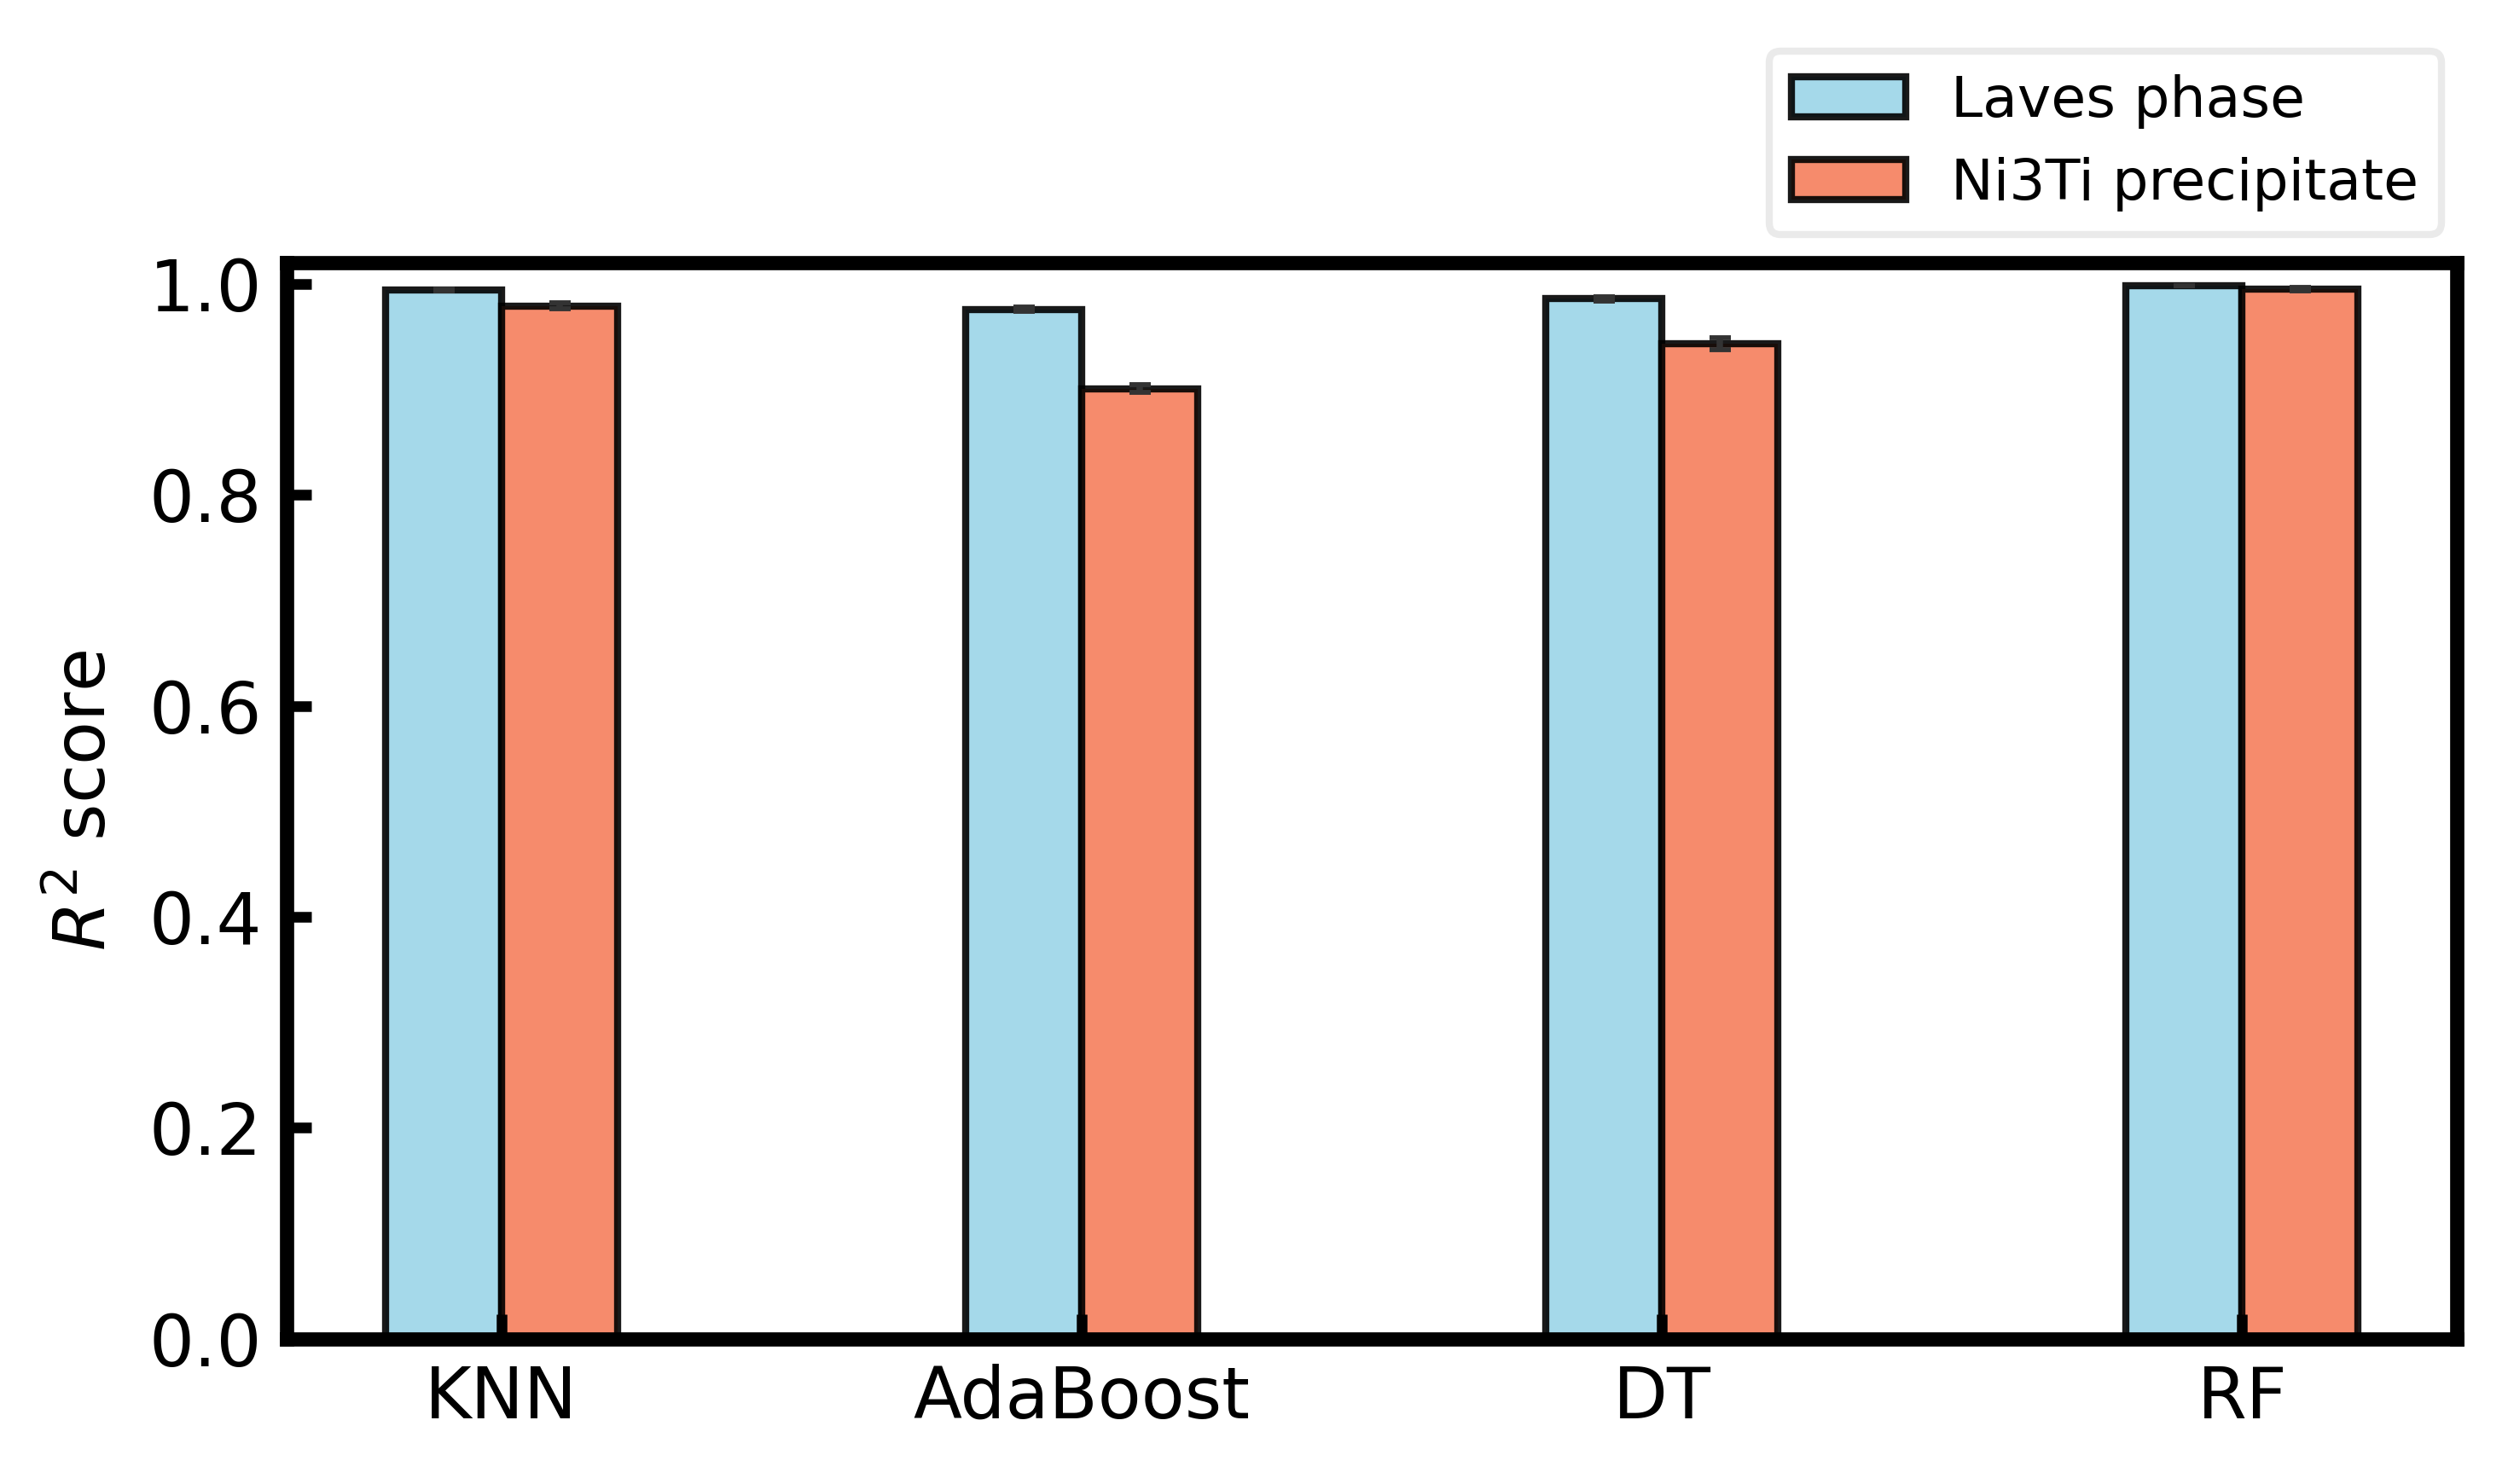

In [33]:
models = ['KNN', 'AdaBoost', 'DT', 'RF']


x = np.arange(len(models))  # the label locations
width = 0.6 # the width of the bars

fig, ax = plt.subplots(figsize = (5,3), dpi = 600)
widths = 2
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

# rects1 = ax.bar(3*x - 1.5*width, T_Ni3Ti_test_accuracy, width, yerr = T_Ni3Ti_test_accuracy_std , 
#                 error_kw = dict(ecolor= '0.2', lw=0.9, capsize=1.5, capthick=0.7), label='T_Ni3Ti', edgecolor ='black', color = '#9BD5E8', alpha =1 ) #F57F5C, midnightblue
# rects2 = ax.bar(3*x - 0.5*width, FCC_test_accuracy, width, yerr = FCC_test_accuracy_std , 
#                 error_kw = dict(ecolor= '0.2', lw=0.9, capsize=1.5, capthick=0.7),label='FCC', edgecolor ='black', color = '#C79FC1', alpha = 0.9) # 9BD5E8, red， #9BD5E8
rects3 = ax.bar(3*x -0.5*width, Laves_test_accuracy, width, yerr = Laves_test_accuracy_std , 
                error_kw = dict(ecolor= '0.2', lw=0.9, capsize=1.5, capthick=0.7),label='Laves phase', edgecolor ='black', color = '#9BD5E8', alpha = 0.9) # 92BEA7, steelblue
rects4 = ax.bar(3*x +0.5*width, Ni3Ti_test_accuracy, width, yerr = Ni3Ti_test_accuracy_std , 
                error_kw = dict(ecolor= '0.2', lw=0.9, capsize=1.5, capthick=0.7),label='Ni3Ti precipitate', edgecolor ='black', color = '#F57F5C', alpha = 0.9) #olive # C79FC1, DFABB9, #C79FC1

# r'$\sin (x)$'
ax.set_ylabel(r'$R^2$ score')
#ax.set_title('depth regression task, test set accuracy')
ax.set_xticks(3*x)
ax.set_xticklabels(models)
ax.set_ylim([0, 1.02])
# plt.legend(loc = 'best',  fontsize = '7', framealpha = 0.4)
plt.legend(loc = 'lower left',  fontsize = '8', framealpha = 0.4, bbox_to_anchor=(0.67, 1)) 
fig.tight_layout()
# plt.show()
save_fig("accuracy_summary_v2")

Saving figure mae_summary(characteristic)_v2


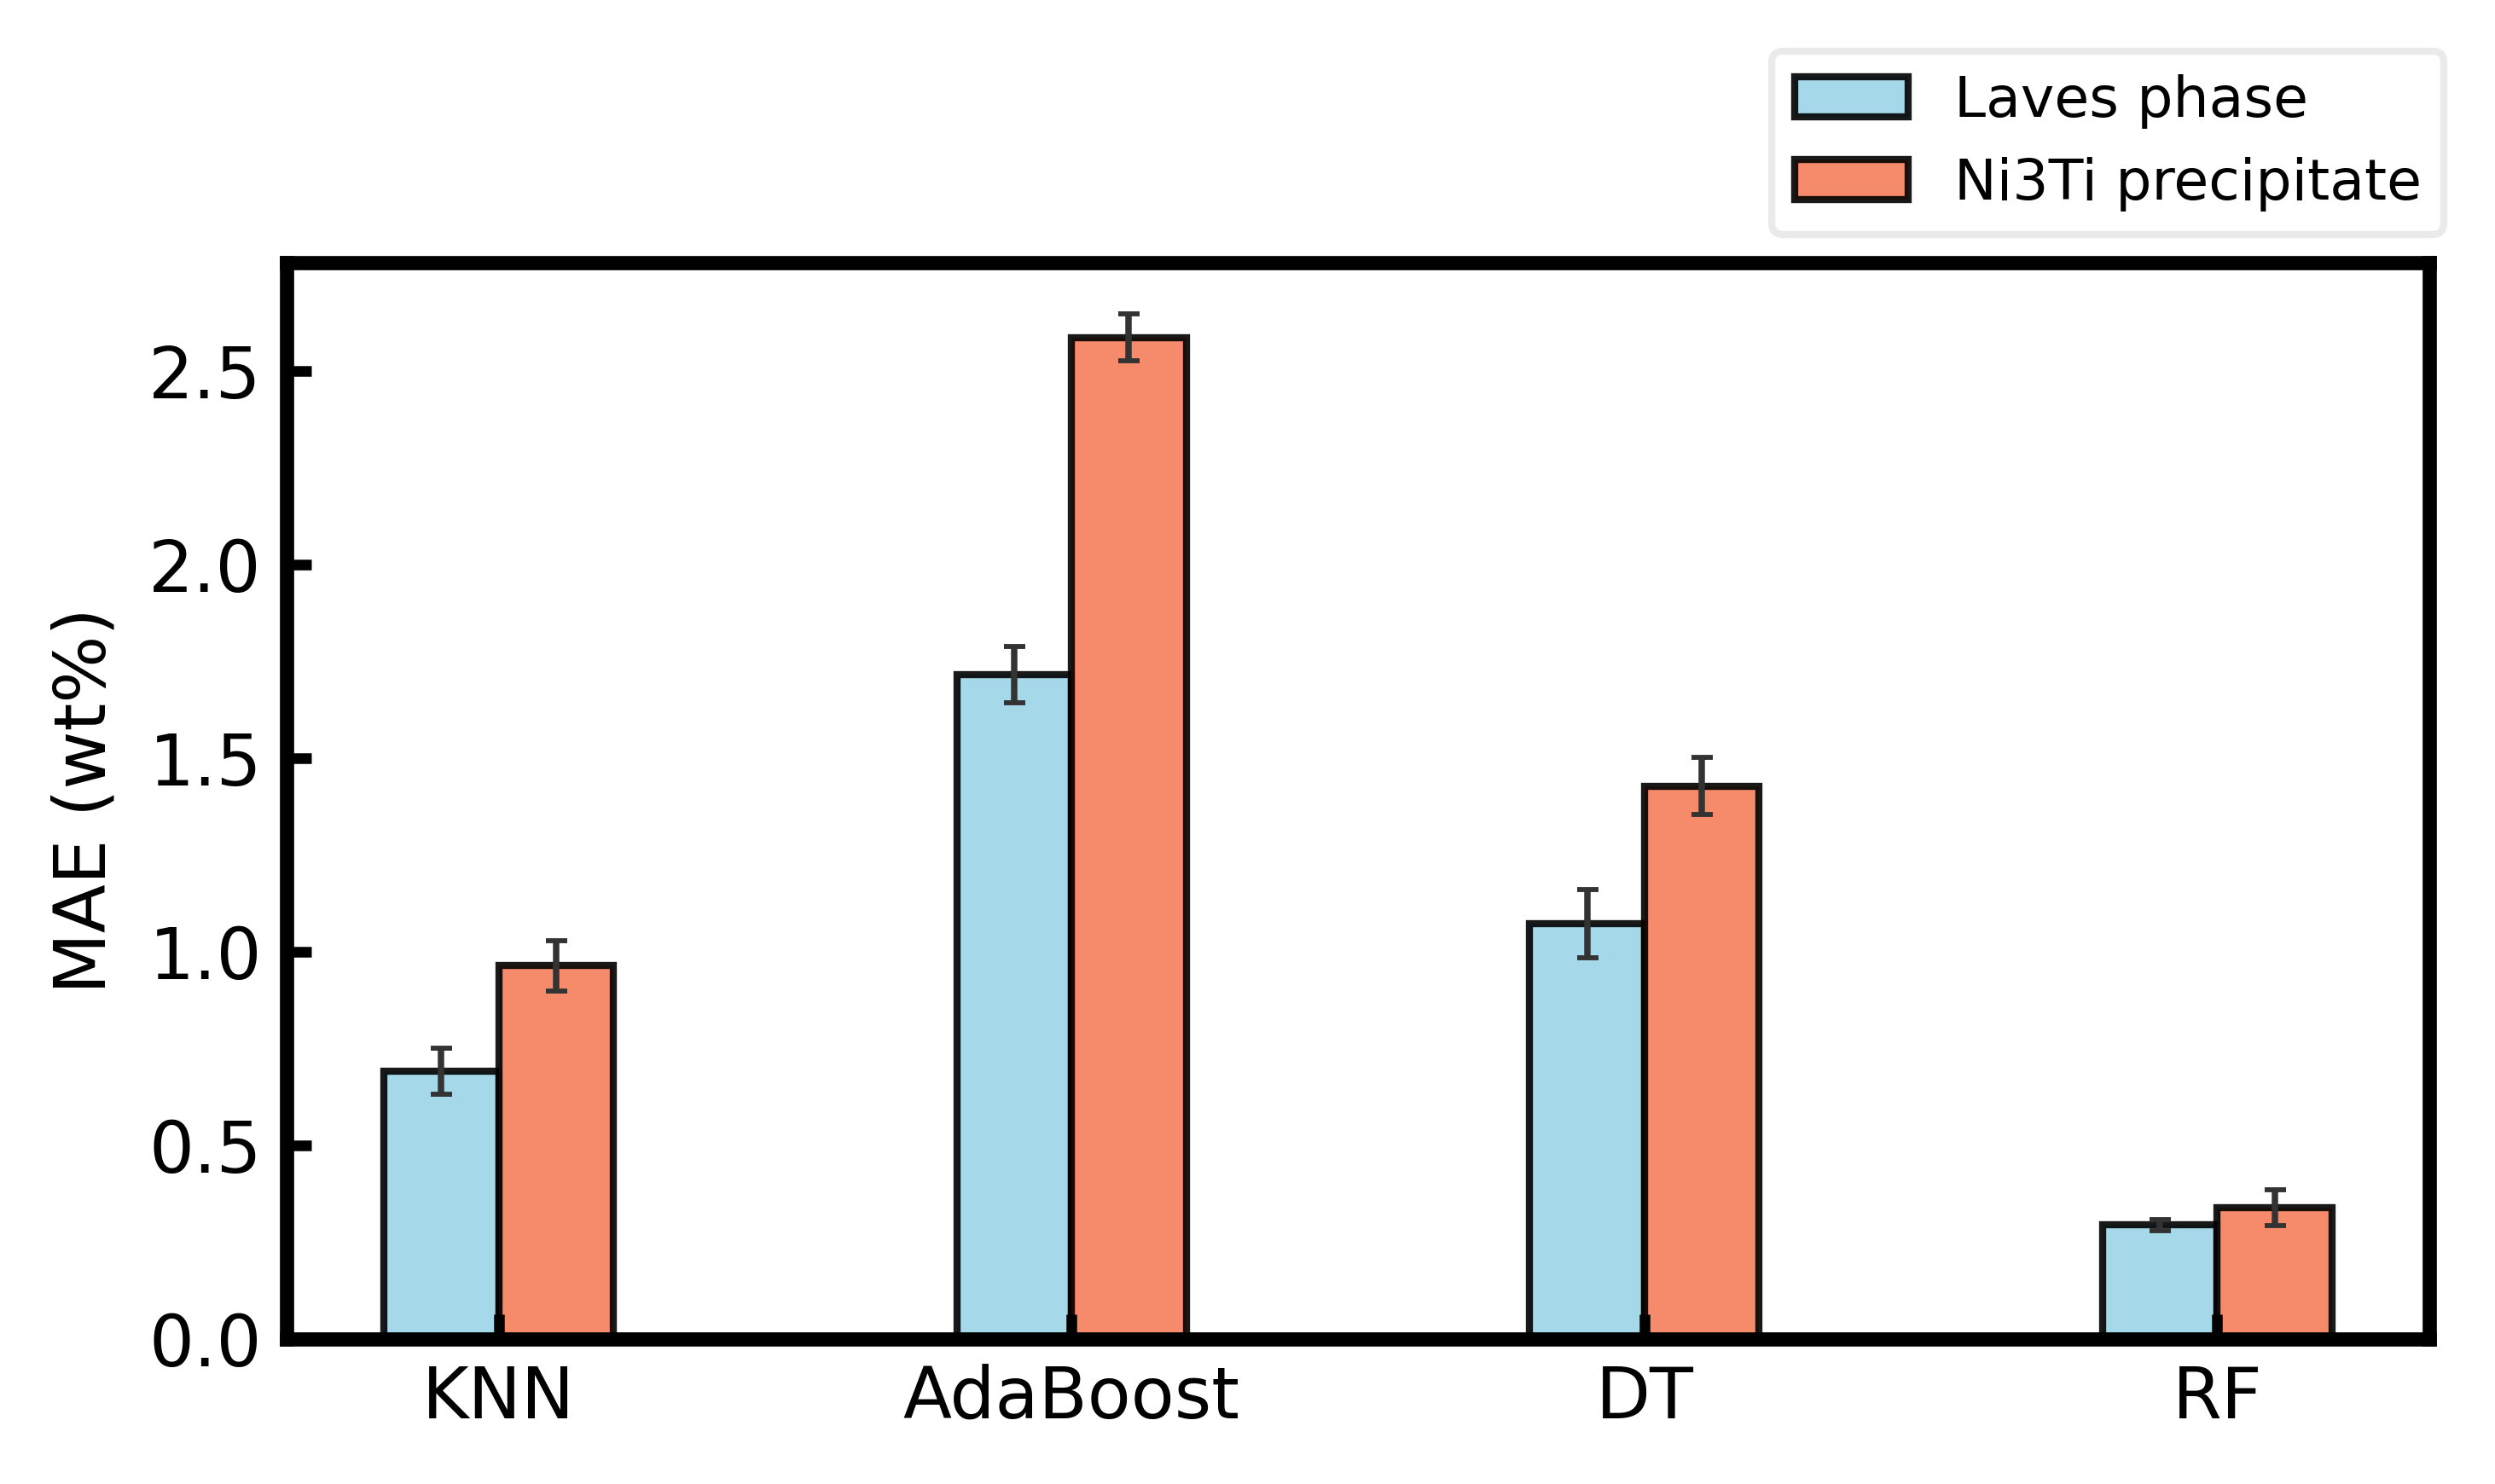

In [34]:
models = ['KNN', 'AdaBoost', 'DT', 'RF']


x = np.arange(len(models))  # the label locations
width = 0.6  # the width of the bars

fig, ax = plt.subplots(figsize = (5,3), dpi = 600)
widths = 2
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

# rects1 = ax.bar(3*x - 1.5*width, T_Ni3Ti_test_mae, width, yerr = T_Ni3Ti_test_mae_std , 
#                 error_kw = dict(ecolor= '0.2', lw=0.9, capsize=1.5, capthick=0.7), label='T_Ni3Ti', edgecolor ='black', color = '#9BD5E8', alpha =1 ) #F57F5C, midnightblue
# rects2 = ax.bar(3*x - 0.5*width, FCC_test_mae, width, yerr = FCC_test_mae_std , 
#                 error_kw = dict(ecolor= '0.2', lw=0.9, capsize=1.5, capthick=0.7),label='FCC', edgecolor ='black', color = '#C79FC1', alpha = 0.9) # 9BD5E8, red
rects3 = ax.bar(3*x - 0.5*width, Laves_test_mae, width, yerr = Laves_test_mae_std , 
                error_kw = dict(ecolor= '0.2', lw=0.9, capsize=1.5, capthick=0.7),label='Laves phase', edgecolor ='black', color = '#9BD5E8', alpha = 0.9) # 92BEA7, steelblue
rects4 = ax.bar(3*x + 0.5*width, Ni3Ti_test_mae, width, yerr = Ni3Ti_test_mae_std , 
                error_kw = dict(ecolor= '0.2', lw=0.9, capsize=1.5, capthick=0.7),label='Ni3Ti precipitate', edgecolor ='black', color = '#F57F5C', alpha = 0.9) #olive # C79FC1, DFABB9

# r'$\sin (x)$'
ax.set_ylabel('MAE (wt%)')
#ax.set_title('depth regression task, test set accuracy')
ax.set_xticks(3*x)
ax.set_xticklabels(models)
# ax.set_ylim([0, 1.02])
# plt.legend(loc = 'upper right',  fontsize = '8', framealpha = 0.4)
plt.legend(loc = 'lower left',  fontsize = '8', framealpha = 0.4, bbox_to_anchor=(0.68, 1)) 
fig.tight_layout()
# plt.show()
save_fig("mae_summary(characteristic)_v2")

In [35]:
Laves_test_mae

[0.691696248408139, 1.7164533791209606, 1.072409055092038, 0.2940430413269521]

Saving figure mae_summary(Temp)


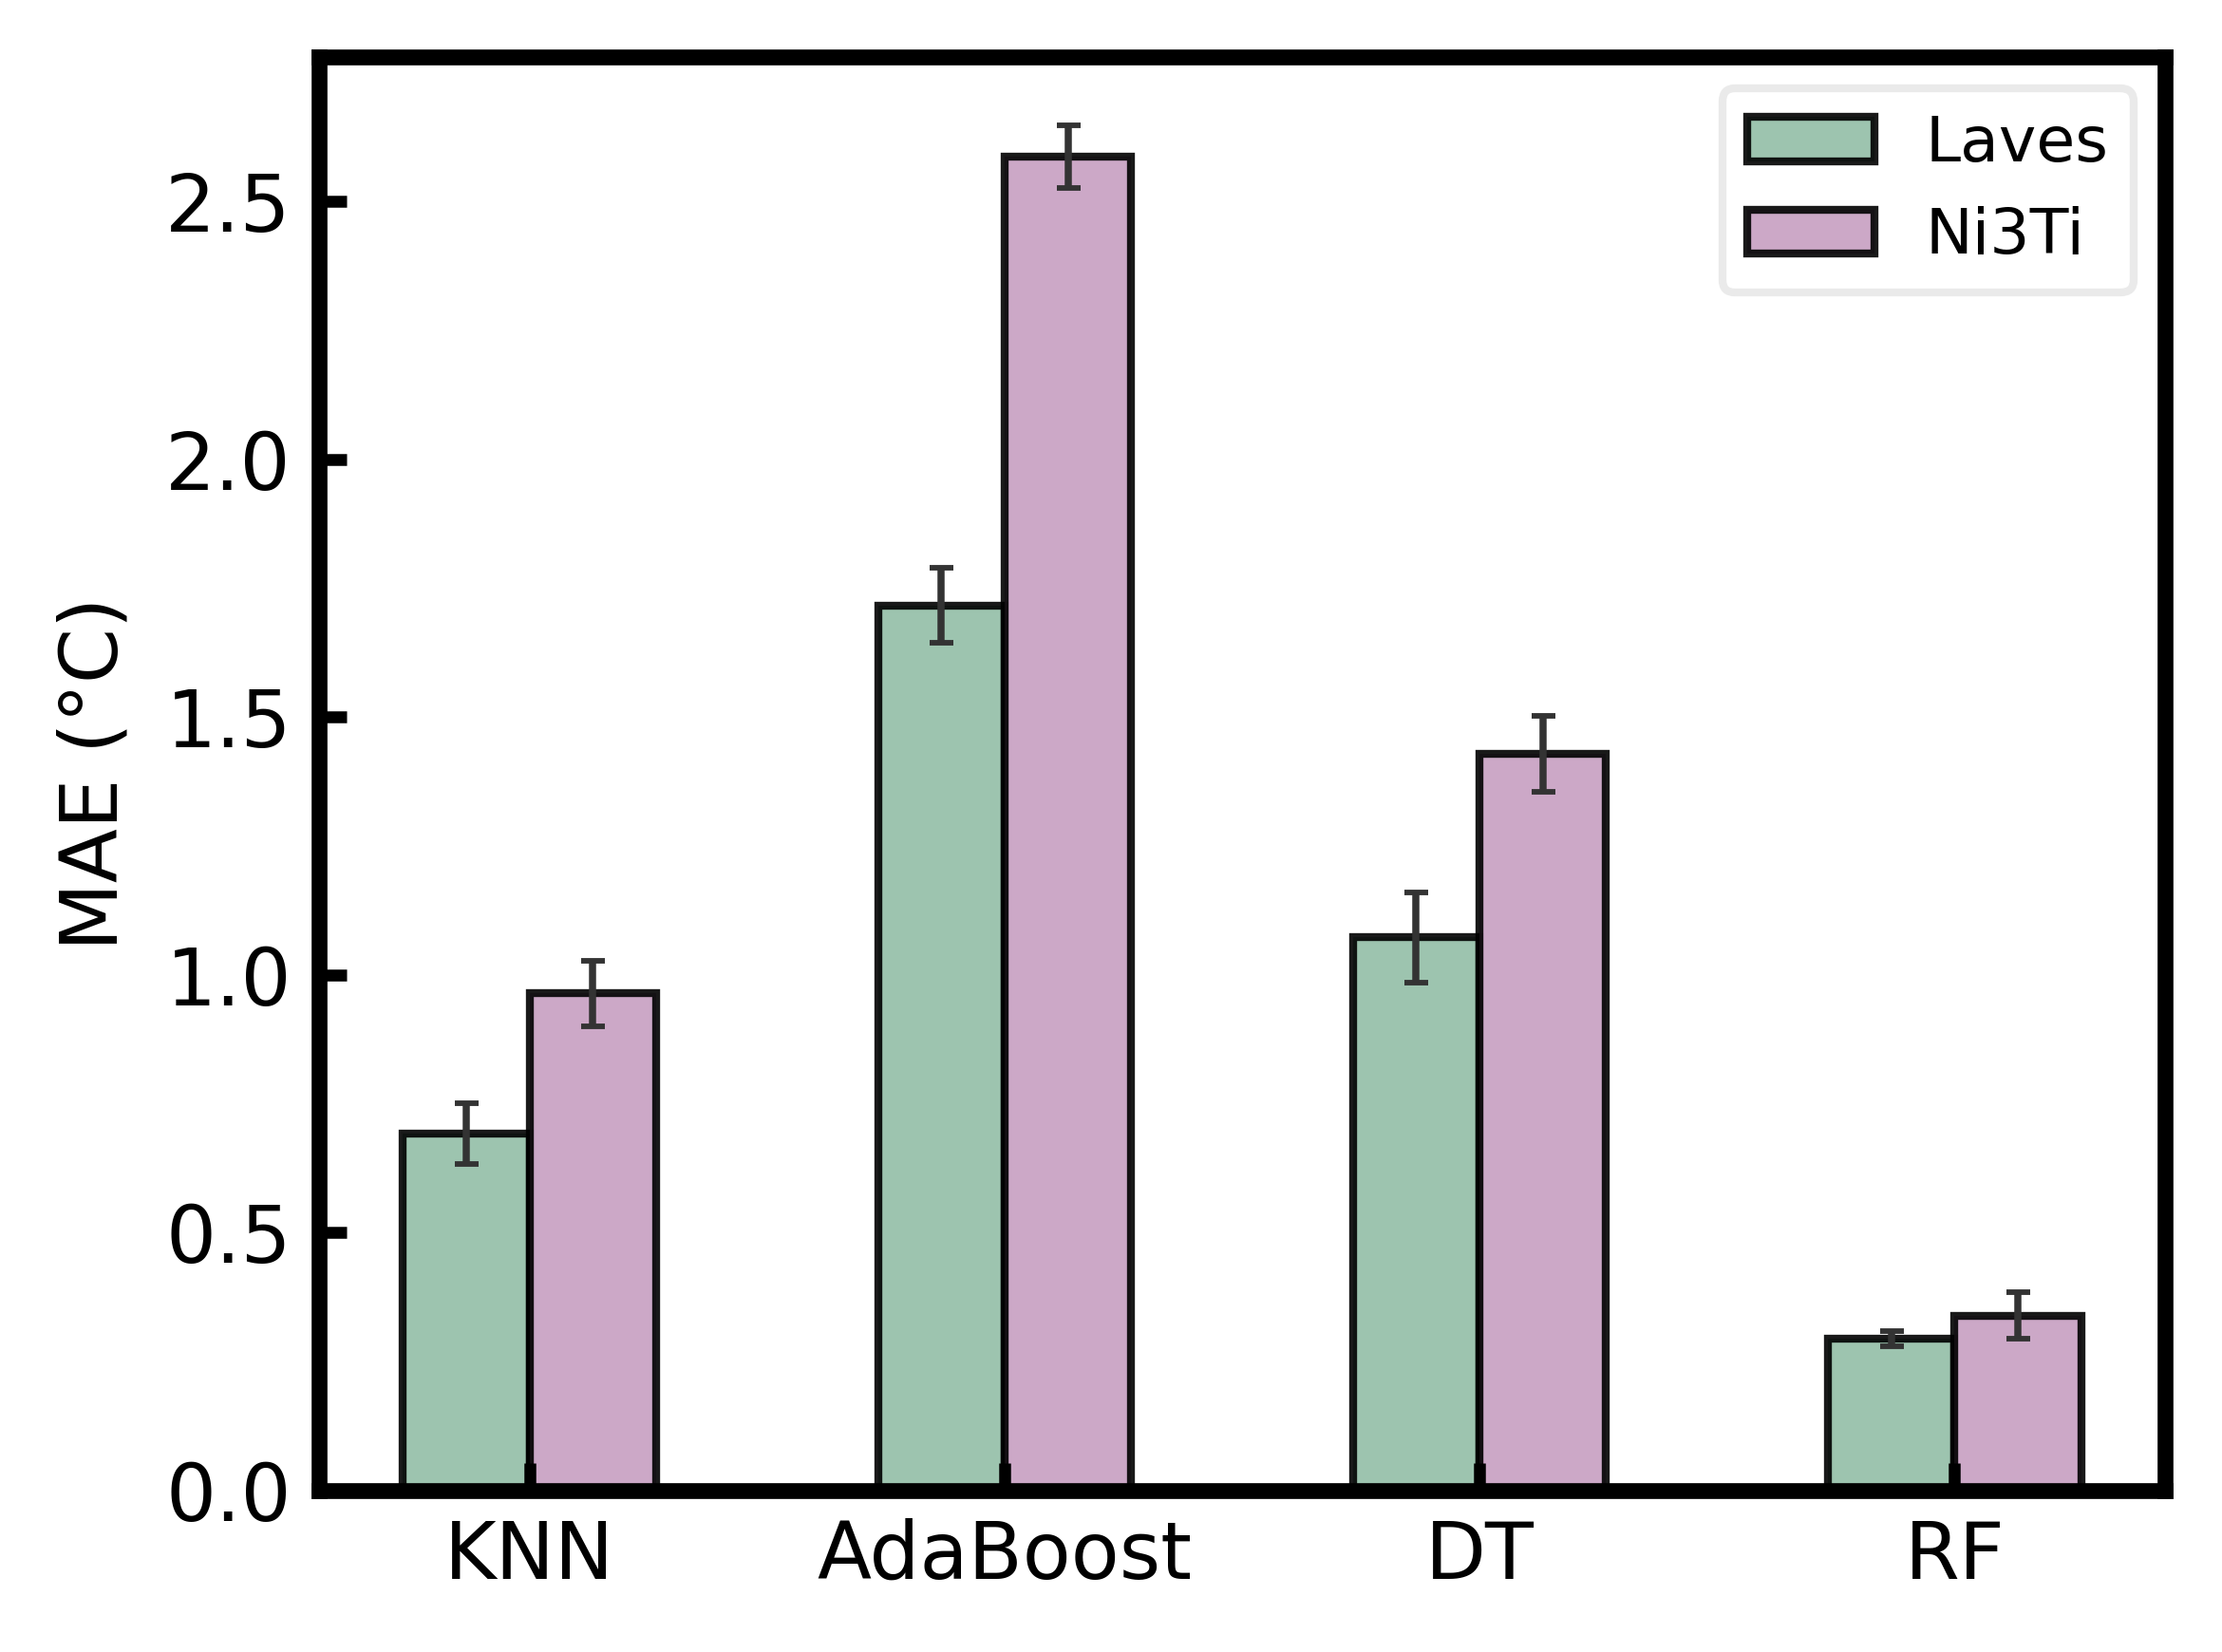

In [36]:
models = ['KNN', 'AdaBoost', 'DT', 'RF']


x = np.arange(len(models))  # the label locations
width = 0.8  # the width of the bars

fig, ax = plt.subplots(figsize = (4,3), dpi = 600)
widths = 2
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)



rects3 = ax.bar(3*x - 0.5*width, Laves_test_mae, width, yerr = Laves_test_mae_std , 
                error_kw = dict(ecolor= '0.2', lw=0.9, capsize=1.5, capthick=0.7),label='Laves', edgecolor ='black', color = '#92BEA7', alpha = 0.9) # 92BEA7, steelblue
rects4 = ax.bar(3*x + 0.5*width, Ni3Ti_test_mae, width, yerr = Ni3Ti_test_mae_std , 
                error_kw = dict(ecolor= '0.2', lw=0.9, capsize=1.5, capthick=0.7),label='Ni3Ti', edgecolor ='black', color = '#C79FC1', alpha = 0.9) #olive # C79FC1, DFABB9

# r'$\sin (x)$'
ax.set_ylabel('MAE (°C)')
#ax.set_title('depth regression task, test set accuracy')
ax.set_xticks(3*x)
ax.set_xticklabels(models)
# ax.set_ylim([0, 1.02])
plt.legend(loc = 'upper right',  fontsize = '8', framealpha = 0.4)
# plt.legend(loc = 'lower left',  fontsize = '5.8', framealpha = 0.4, bbox_to_anchor=(1, 0)) 
fig.tight_layout()
# plt.show()
save_fig("mae_summary(Temp)")

## R2 error plots

## Composition design optimization:  single-objective

reference: https://pablormier.github.io/2017/09/05/a-tutorial-on-differential-evolution-with-python/

In [37]:
# Use differential evolution:
# Objective function:
def ObjectiveFunction(x, *args):

    # objective function value:
    obj = 0.0 # initialize

    # Decision variables: x = [Ni, Ti, Al]


    # Data standardization (transform the data so that they have a near-normally distribution with zero mean and unit variance)
    # Reference: "Data transformation with held out data" on https://scikit-learn.org/stable/modules/cross_validation.html
    x_transformed = scaler.transform([x])

    # Objective function values:

    ## Only required for Polynomial regression:
    #x_transformed = poly.fit_transform(x_transformed)

    Ni3Ti = metamodel_Ni3Ti_RF.predict(x_transformed)
    Laves = metamodel_Laves_RF.predict(x_transformed)


    # Make sure wt%Laves is less than a max value:
    maxLaves = 5.0
    if Laves > maxLaves:
        #return 1000
        obj += 1000


    # Make sure wt%Al < wt%Ti:
    if x[2] >= x[1]:
        #return 1000
        obj += 1000

    ## Make sure wt%Al >= 1:
    #if x[2] < 1:
        #obj += 1000

    # Objectie function: maximize Ni3Ti, minimize Laves, minimize FCC, maximize T_Ni3Ti:
    # Minimize the positive terms and maximize the negative terms:
    obj += - 1.0 * Ni3Ti / Ni3Ti_upper \
           + 1.0 * Laves / Laves_upper \


    return obj

In [38]:
# Bound constraint:  wt% Ni, Ti, Al
bounds = [(18.0, 21.0), (5.0, 10.0), (1, 5.0)]

# Optimization:
# reference: https://pablormier.github.io/2017/09/05/a-tutorial-on-differential-evolution-with-python/
result = differential_evolution(ObjectiveFunction, bounds, maxiter=100, strategy='rand1bin')

print("\n==========Single objective optimization============")
print('Status : %s' % result['message'])
print("The minimum objective function value is: " + format(result.fun))

print("Optimized composition:")
print("Ni = " + format(result.x[0]) + "wt%")
print("Ti = " + format(result.x[1]) + "wt%")
print("Al = " + format(result.x[2]) + "wt%")


==========Single objective optimization============
Status : Optimization terminated successfully.
The minimum objective function value is: -0.8147621952277815
Optimized composition:
Ni = 20.847231224828754wt%
Ti = 6.310391118492715wt%
Al = 2.539756090075607wt%


In [39]:
import numpy as np

def de(fobj, bounds, mut=0.8, crossp=0.7, popsize=20, its=1000):
    dimensions = len(bounds)
    pop = np.random.rand(popsize, dimensions)
    min_b, max_b = np.asarray(bounds).T
    diff = np.fabs(min_b - max_b)
    pop_denorm = min_b + pop * diff
    fitness = np.asarray([fobj(ind) for ind in pop_denorm])
    best_idx = np.argmin(fitness)
    best = pop_denorm[best_idx]
    for i in range(its):
        for j in range(popsize):
            idxs = [idx for idx in range(popsize) if idx != j]
            a, b, c = pop[np.random.choice(idxs, 3, replace = False)]
            mutant = np.clip(a + mut * (b - c), 0, 1)
            cross_points = np.random.rand(dimensions) < crossp
            if not np.any(cross_points):
                cross_points[np.random.randint(0, dimensions)] = True
            trial = np.where(cross_points, mutant, pop[j])
            trial_denorm = min_b + trial * diff
            f = fobj(trial_denorm)
            if f < fitness[j]:
                fitness[j] = f
                pop[j] = trial
                if f < fitness[best_idx]:
                    best_idx = j
                    best = trial_denorm
        yield best, fitness[best_idx]

In [40]:
# The resultant Ni3Ti, Laves, and FCC wt% at the optimized composition:
x_transformed = scaler.transform([[result.x[0], result.x[1], result.x[2]]])

## Only required for Polynomial regression:
#x_transformed = poly.fit_transform(x_transformed)

print("wt% Ni3Ti = " + format(metamodel_Ni3Ti_RF.predict(x_transformed)))
print("wt% Laves = " + format(metamodel_Laves_RF.predict(x_transformed)))
# print("wt% FCC = " + format(metamodel_FCC_RF.predict(x_transformed)))
# print("Ni3Ti formation temperature (k) = " + format(metamodel_T_Ni3Ti_KNN.predict(x_transformed)))
print("===================================================\n")

wt% Ni3Ti = [26.59226047]
wt% Laves = [1.02793912]

